#### 数据集信息

1、帖文：
url链接、内容、发布时间、账号id、昵称、点赞数、评论数、转发数、帖文类型(07原贴,08评论，09转发)、原贴唯一标识（page_action_type）、贴文唯一标识

2、用户：
用户账号id、昵称、主页url、粉丝数、关注数、是否认证、微博账号类型(SNS_LEVEL)、个人认证(USER_GRADE)、简介、地域、认证说明

1、帖文
英文字段：url、content、publish_time、userid、username、cnt_agree、cnt_comment、cnt_retweet、page_action_type、relevant_topic_guid、topic_guid
中文字段：url链接、内容、发布时间、账号id、昵称、点赞数、评论数、转发数、帖文类型(07原贴,08评论，09转发)、原贴唯一标识（page_action_type为07时，该值为贴文自己的唯一标识relevant_topic_guid==topic_guid；page_action_type为08或09时，该值为原贴的唯一标识）、贴文唯一标识

2、用户：
英文字段：account_id、nickname、mbloger_url、fans_counter、follow_counter、if_validate、sns_level、user_grade、personal_desc、area_code、validate_info
中文描述：用户：账号id、昵称、主页url、粉丝数、关注数、是否认证、微博账号类型(SNS_LEVEL)、个人认证(USER_GRADE)、简介、地域、认证说明

## 帖文内容词频统计与情感分析
**帖文词频统计(中英)**

    -->使用结巴/NLTK/Spacy基于词性分词，统计词频，做‘面’上的展示
    -->对大趋势是离群点， 做‘点’上的展示

**帖文情感分析(中英)**

    -->内容情感随时间的演化，pos/neg均分和数量的变化（中&英，微博&推特），观察坡峰坡谷时间点。
    -->基于帖文，随时间维度的情感倾向变化
    -->展示命名实体的情感倾向



In [45]:
# 改进方向 ---20/11/2021
# 基于用户数放入的情感统计，用户帖文比例
# 根据赞评转数量分类，使用聚类分类，结合各类别与情感关联

In [46]:
import os
import json
from tqdm import tqdm


# make file record all titles
titles_file_weibo = '/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析/cnt_weibo.txt'

f_titles = open(titles_file_weibo, 'w', encoding='utf8')
count = 0 # count title numbers

# list all json files
operate_path = r"/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析"
for root, dirs, files in os.walk(operate_path, topdown=False):
    for name in tqdm(files):
        # current json file path
        json_file = os.path.join(root, name)
        # extract title form json file
        with open(json_file, 'r', encoding='utf8') as load_f:
            try:
                load_dict = json.load(load_f)
                for i in load_dict:
                    if i["url"][10:15]=="weibo":
                        try:      
                            user=i["userid"]
                            content = i["content"]
                            time = i["publish_time"]
                            page_type =i["page_action_type"]
                            relate_topic_id=i["relevant_topic_guid"]
                            topic_id=i["topic_guid"]  

                            agree=i["cnt_agree"]
                            comment=i["cnt_comment"]
                            retweet=i["cnt_retweet"]
                            title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+agree+'\t'+comment+'\t'+retweet+'\n'

                        except:
                            user=i["user_id"]
                            content = i["content"]
                            time = i["publish_time"]
                            page_type =i["page_action_type"]
                            relate_topic_id=i["relevant_topic_guid"]
                            topic_id=i["topic_guid"]  
                    
                            
                            title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+"0"+'\t'+"0"+'\t'+"0"+'\n'
                    f_titles.write(title)
                count += 1 # count titles number
            except:
                pass


# close file
f_titles.close()
print(count) 

100%|██████████| 223/223 [00:00<00:00, 389.67it/s]

178


In [47]:
import os
import json
from tqdm import tqdm


# make file record all titles
titles_file_twitter = '/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析/cnt_twitter.txt'

f_titles = open(titles_file_twitter, 'w', encoding='utf8')
count = 0 # count title numbers

# list all json files
operate_path = r"/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析"
for root, dirs, files in os.walk(operate_path, topdown=False):
    for name in tqdm(files):
        # current json file path
        json_file = os.path.join(root, name)
        # extract title form json file
        with open(json_file, 'r', encoding='utf8') as load_f:
            try:
                load_dict = json.load(load_f)
                for i in load_dict:
                    if i["url"][8:15]=="twitter":
                        try:      
                            user=i["userid"]
                            content = i["content"]
                            time = i["publish_time"]
                            page_type =i["page_action_type"]
                            relate_topic_id=i["relevant_topic_guid"]
                            topic_id=i["topic_guid"]  

                            agree=i["cnt_agree"]
                            comment=i["cnt_comment"]
                            retweet=i["cnt_retweet"]
                            title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+agree+'\t'+comment+'\t'+retweet+'\n'

                        except:
                            user=i["user_id"]
                            content = i["content"]
                            time = i["publish_time"]
                            page_type =i["page_action_type"]
                            relate_topic_id=i["relevant_topic_guid"]
                            page_type =i["page_action_type"]
                            
                            title = user+'\t'+content.strip() +'\t'+ time[:8]+'\t'+page_type+'\t'+relate_topic_id+'\t'+topic_id+'\t'+"0"+'\t'+"0"+'\t'+"0"+'\n'
                    f_titles.write(title)

                count += 1 # count titles number
            except:
                pass


# close file
f_titles.close()
print(count) 

100%|██████████| 223/223 [00:00<00:00, 918.89it/s]

218


In [48]:
titles_file_twitter = '/Users/patricia/Downloads/WnT-20210929/cnt/舆情分析/cnt_twitter.txt'

contents = []
with open(titles_file_twitter, 'r') as f:
    n=0
    for line in f:
        #print(line)
        contents.extend(line)
        n+=1
    print(n)

22262


In [49]:
import pandas as pd
twitter_info=pd.read_table(titles_file_twitter,sep="\n",encoding='utf-8',index_col=False,names=["info"])
twitter_info

info
0      ElPortal24\tEconomista dice que El Salvador 'e...
1      Crypto_Freakie\tShanghai Man: Economist says E...
2      webnowcompany\tThe feature comes months after ...
3      ElPortal24\tEconomista dice que El Salvador &a...
4      LUCATYLER_\tShanghai Man: Economist says El Sa...
...                                                  ...
22257  andreu_bernabeu\tAmazon dando soluciones exclu...
22258  andreu_bernabeu\tAmazon dando soluciones exclu...
22259  andreu_bernabeu\tAmazon dando soluciones exclu...
22260  andreu_bernabeu\tAmazon dando soluciones exclu...
22261  andreu_bernabeu\tAmazon dando soluciones exclu...

[22262 rows x 1 columns]

In [50]:
twitter=[]
for i in twitter_info["info"]:
    twitter.append(i.split("\t"))
twitter

[['ElPortal24',
  "Economista dice que El Salvador 'en camino a la muerte', sueldos pagados en e-CNY … - https://t.co/AnYdO4jK0Q",
  '20210618',
  '07',
  '1251f15f720ac07625fb8b2b9c9d475b',
  '1251f15f720ac07625fb8b2b9c9d475b',
  '0',
  '0',
  '0'],
 ['Crypto_Freakie',
  "Shanghai Man: Economist says El Salvador 'on road to death', salaries paid in e-CNY ... https://t.co/YUHryvJSp5#btc #eth #doge #bnb #crypto #xrp #ada #dot #bch #ltc #uni #crypto #cryptocurrency #cryptonews10%discount on #Binance :https://t.co/X88WOkuryx https://t.co/P8oG7vFlH1",
  '20210618',
  '07',
  '4781a1bcc6fe3c71f1237ce50cc29e72',
  '4781a1bcc6fe3c71f1237ce50cc29e72',
  '0',
  '0',
  '0'],
 ['webnowcompany',
  'The feature comes months after a small-scale test in Beijing and is yet another sign China is widening its e-CNY tests towards a full launch.The post Chine...Read more: https://t.co/8pEV3fSya7',
  '20210618',
  '07',
  '0455338c1be95db57d8e87d52e202df8',
  '0455338c1be95db57d8e87d52e202df8',
  '1',
  '0

In [51]:
twitter=pd.DataFrame(twitter)
twitter.columns=["userid","content","publish_time","page_action_type","relevant_topic_guid","topic_guid","cnt_agree","cnt_comment","cnt_retweet"]
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22262 entries, 0 to 22261
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   userid               22262 non-null  object
 1   content              22262 non-null  object
 2   publish_time         22262 non-null  object
 3   page_action_type     22262 non-null  object
 4   relevant_topic_guid  22262 non-null  object
 5   topic_guid           22262 non-null  object
 6   cnt_agree            22262 non-null  object
 7   cnt_comment          22262 non-null  object
 8   cnt_retweet          22262 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [52]:
#将时间类型从object转成时间类型，默认format=’%Y-%m-%d’
twitter["publish_time"]= pd.to_datetime(twitter["publish_time"],format='%Y-%m-%d') 
twitter["publish_time"]

0       2021-06-18
1       2021-06-18
2       2021-06-18
3       2021-06-18
4       2021-06-18
           ...    
22257   2021-05-07
22258   2021-05-07
22259   2021-05-07
22260   2021-05-07
22261   2021-05-07
Name: publish_time, Length: 22262, dtype: datetime64[ns]

In [53]:
twitter.publish_time.min(),twitter.publish_time.max()

(Timestamp('2010-02-12 00:00:00'), Timestamp('2021-09-28 00:00:00'))

In [54]:
twitter['dayofweek'] = twitter.publish_time.dt.weekday #pd.Series.dt.weekday判断某个日期是星期几,星期一为0

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

twitter['dayofweek'] =[days[i] for i in twitter['dayofweek'] ]                       

twitter['dayofweek']

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
22257    Friday
22258    Friday
22259    Friday
22260    Friday
22261    Friday
Name: dayofweek, Length: 22262, dtype: object

## 原帖 进行点赞数、评论数、转发数统计
原帖情感

In [55]:
twitter["page_action_type"].value_counts()

08    14191
07     8071
Name: page_action_type, dtype: int64

In [56]:
original=twitter[twitter["page_action_type"]=="07"]
comment=twitter[twitter["page_action_type"]=="08"]
original.count(),comment.count()

(userid                 8071
 content                8071
 publish_time           8071
 page_action_type       8071
 relevant_topic_guid    8071
 topic_guid             8071
 cnt_agree              8071
 cnt_comment            8071
 cnt_retweet            8071
 dayofweek              8071
 dtype: int64,
 userid                 14191
 content                14191
 publish_time           14191
 page_action_type       14191
 relevant_topic_guid    14191
 topic_guid             14191
 cnt_agree              14191
 cnt_comment            14191
 cnt_retweet            14191
 dayofweek              14191
 dtype: int64)

In [57]:
print(original["content"])
comment["content"]

0        Economista dice que El Salvador 'en camino a l...
1        Shanghai Man: Economist says El Salvador 'on r...
2        The feature comes months after a small-scale t...
3        Economista dice que El Salvador &amp;#039;en c...
4        Shanghai Man: Economist says El Salvador 'on r...
                               ...                        
22129    Digital Yuan Launch Draws Near: https://t.co/2...
22130    Digital Yuan Launch Draws Near: https://t.co/X...
22131    Digital Yuan Launch Draws Near: https://t.co/K...
22132    https://t.co/u2QtP3oBwr Employees Paid in e-CN...
22133    Digital Yuan launch steps: https://t.co/XiudFE...
Name: content, Length: 8071, dtype: object


16         @offweightstudio 有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了
17                       @wangzhian8848 封杀比特币是不是给数字人民币腾地方？
18       @dougjing @dw_chinese 不算，数字人民币本质上也是人民币，和现金是兑换的...
19       @HenryLa13947038 数字人民币是现实中的人民币的数字化，和比特币这种基于虚拟计...
20       @ThECRackERBaRoN 昨天刚听了微博上卡相他们的一个关于虚拟货币的连线直播，还是...
                               ...                        
22257    Amazon dando soluciones exclusivas a los farme...
22258    Amazon dando soluciones exclusivas a los farme...
22259    Amazon dando soluciones exclusivas a los farme...
22260    Amazon dando soluciones exclusivas a los farme...
22261    Amazon dando soluciones exclusivas a los farme...
Name: content, Length: 14191, dtype: object

In [58]:
import langid   
cnt=original.copy()
cnt["language"]=cnt["content"].apply(lambda x: (langid.classify(x))[0] )
cnt["language"].count()

8071

In [59]:
cnt.groupby("language").count().sort_values("topic_guid",ascending=False)[:10]

userid  content  publish_time  page_action_type  \
language                                                    
zh          4567     4567          4567              4567   
en          2560     2560          2560              2560   
es           306      306           306               306   
ja           188      188           188               188   
fr            80       80            80                80   
tr            46       46            46                46   
pt            44       44            44                44   
ru            42       42            42                42   
th            32       32            32                32   
pl            22       22            22                22   

          relevant_topic_guid  topic_guid  cnt_agree  cnt_comment  \
language                                                            
zh                       4567        4567       4567         4567   
en                       2560        2560       2560         2560   
es                        306         306        306          306   
ja                        188         188        188          188   
fr                         80          80         80           80   
tr                         46          46         46           46   
pt                         44          44         44           44   
ru                         42          42         42           42   
th                         32          32         32           32   
pl                         22          22         22           22   

          cnt_retweet  dayofweek  
language                          
zh               4567       4567  
en               2560       2560  
es                306        306  
ja                188        188  
fr                 80         80  
tr                 46         46  
pt                 44         44  
ru                 42         42  
th                 32         32  
pl                 22         22

In [60]:
original_chi=cnt[cnt["language"]=="zh"]
raw_original_chi=cnt[cnt["language"]=="zh"]
original_eng=cnt[cnt["language"]=="en"]
raw_original_eng=cnt[cnt["language"]=="en"]

In [61]:
original_chi.count(),original_eng.count()

(userid                 4567
 content                4567
 publish_time           4567
 page_action_type       4567
 relevant_topic_guid    4567
 topic_guid             4567
 cnt_agree              4567
 cnt_comment            4567
 cnt_retweet            4567
 dayofweek              4567
 language               4567
 dtype: int64,
 userid                 2560
 content                2560
 publish_time           2560
 page_action_type       2560
 relevant_topic_guid    2560
 topic_guid             2560
 cnt_agree              2560
 cnt_comment            2560
 cnt_retweet            2560
 dayofweek              2560
 language               2560
 dtype: int64)

### Twitter英文原帖
点赞、评论、转发数反映正负情感关注度


In [62]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 
original_eng["content"]=original_eng["content"].apply(lambda x : tweet_tokenizer.tokenize(x))
original_eng["content"]

<ipython-input-62-5fb53faec917>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_eng["content"]=original_eng["content"].apply(lambda x : tweet_tokenizer.tokenize(x))


1        [Shanghai, Man, :, Economist, says, El, Salvad...
2        [The, feature, comes, months, after, a, small-...
5        [Shanghai, Man, :, Economist, says, El, Salvad...
6        [Shanghai, Man, :, Economist, says, El, Salvad...
12       [Shanghai, Man, :, Economist, says, El, Salvad...
                               ...                        
22129    [Digital, Yuan, Launch, Draws, Near, :, https:...
22130    [Digital, Yuan, Launch, Draws, Near, :, https:...
22131    [Digital, Yuan, Launch, Draws, Near, :, https:...
22132    [https://t.co/u2QtP3oBwr, Employees, Paid, in,...
22133    [Digital, Yuan, launch, steps, :, https://t.co...
Name: content, Length: 2560, dtype: object

In [63]:
import re
import string
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\'',' ', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\b\w{1,2}\b', " ", text)# removes remaining one-letter words and two letters words 
    return text 

original_eng["content"]=original_eng["content"].apply(lambda x : remove_url(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : remove_punct(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : remove_emoji(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : decontraction(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : seperate_alphanumeric(str(x)))
original_eng["content"]=original_eng["content"].apply(lambda x : clean_text(str(x)))
original_eng["content"].head(20)

<ipython-input-63-e8d4caef2b16>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_eng["content"]=original_eng["content"].apply(lambda x : remove_url(str(x)))
<ipython-input-63-e8d4caef2b16>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_eng["content"]=original_eng["content"].apply(lambda x : remove_punct(str(x)))
<ipython-input-63-e8d4caef2b16>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

1      shanghai man economist says   salvador   road ...
2      the feature comes months after   smallscale te...
5      shanghai man economist says   salvador   road ...
6      shanghai man economist says   salvador   road ...
12     shanghai man economist says   salvador   road ...
14     shanghai man economist says   salvador   road ...
26     shanghai man economist says   salvador   road ...
55     digital renminbi ecny can   now withdrawn   at...
56     new post economist says   salvador   road   de...
81              china reveals ecny wallet specifications
85     zhejiang ecommerce bank   ltd has become the s...
86              china reveals ecny wallet specifications
88     china   central bank has unveiled specificatio...
121    digitalfriendly services products booming   ch...
122    digitalfriendly services products booming   ch...
123    crypto panic digitalfriendly services products...
130    digitalyuan debuts   futures transaction ecny ...
131    subscriberwrites china  

In [64]:
from nltk.corpus import stopwords
stopwords_list= stopwords.words('english')
def remove_stop_words(text, stopwords=set(stopwords.words('english'))):
    """ This function removes stop words from a text
        inputs:
         - stopword list
         - text """

    # prepare new text
    text_splitted = "".join(text).split(" ")
    text_new = list()
    
    # stop words updated
    # stopwords = stopwords.union({"amp", "grocery store", "covid", "supermarket", "people", "grocery", "store", "price", "time"})
    
    # loop
    for word in text_splitted:
        if word not in stopwords:
            text_new.append(word)
    return " ".join(text_new)

def clean_stopwords(df, label):
    """ This function removes stopwords """
    df[label] = df[label].apply(lambda x: remove_stop_words(x))
    return df

original_eng["content"]=original_eng["content"].apply(lambda x: re.sub(r'\b\w{1,2}\b', " ", x))
original_eng["content"]=original_eng["content"].apply(lambda x: re.sub(r"[ \t]{2,}", " ", x))
eng=original_eng.copy()# no stopwords removal,lemmilization for sentimental analysis
eng.head()

<ipython-input-64-6a865487c42e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_eng["content"]=original_eng["content"].apply(lambda x: re.sub(r'\b\w{1,2}\b', " ", x))
<ipython-input-64-6a865487c42e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_eng["content"]=original_eng["content"].apply(lambda x: re.sub(r"[ \t]{2,}", " ", x))


userid                                            content  \
1    Crypto_Freakie  shanghai man economist says salvador road deat...   
2     webnowcompany  the feature comes months after smallscale test...   
5        btcnewsapp  shanghai man economist says salvador road deat...   
6   Beegamesnetwork  shanghai man economist says salvador road deat...   
12  BTCTechGroupLL1  shanghai man economist says salvador road deat...   

   publish_time page_action_type               relevant_topic_guid  \
1    2021-06-18               07  4781a1bcc6fe3c71f1237ce50cc29e72   
2    2021-06-18               07  0455338c1be95db57d8e87d52e202df8   
5    2021-06-18               07  ce757682e7b303e9b295167da69b9fc7   
6    2021-06-18               07  5548bc7ce912561656d910328880d913   
12   2021-06-18               07  de72cde39681fff3b729e11361a08133   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
1   4781a1bcc6fe3c71f1237ce50cc29e72         0           0           0   
2   0455338c1be95db57d8e87d52e202df8         1           0           1   
5   ce757682e7b303e9b295167da69b9fc7         0           0           0   
6   5548bc7ce912561656d910328880d913         0           0           0   
12  de72cde39681fff3b729e11361a08133         0           0           0   

   dayofweek language  
1     Friday       en  
2     Friday       en  
5     Friday       en  
6     Friday       en  
12    Friday       en

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #pip install vaderSentiment
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df
eng = compute_vader_scores(eng , "content")
eng['comp_score'] = eng ['vader_comp'].apply(lambda c: 'pos' if c >0 else('neu' if c==0 else 'neg'))
eng.head()

userid                                            content  \
1    Crypto_Freakie  shanghai man economist says salvador road deat...   
2     webnowcompany  the feature comes months after smallscale test...   
5        btcnewsapp  shanghai man economist says salvador road deat...   
6   Beegamesnetwork  shanghai man economist says salvador road deat...   
12  BTCTechGroupLL1  shanghai man economist says salvador road deat...   

   publish_time page_action_type               relevant_topic_guid  \
1    2021-06-18               07  4781a1bcc6fe3c71f1237ce50cc29e72   
2    2021-06-18               07  0455338c1be95db57d8e87d52e202df8   
5    2021-06-18               07  ce757682e7b303e9b295167da69b9fc7   
6    2021-06-18               07  5548bc7ce912561656d910328880d913   
12   2021-06-18               07  de72cde39681fff3b729e11361a08133   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
1   4781a1bcc6fe3c71f1237ce50cc29e72         0           0           0   
2   0455338c1be95db57d8e87d52e202df8         1           0           1   
5   ce757682e7b303e9b295167da69b9fc7         0           0           0   
6   5548bc7ce912561656d910328880d913         0           0           0   
12  de72cde39681fff3b729e11361a08133         0           0           0   

   dayofweek language  vader_neg  vader_neu  vader_pos  vader_comp comp_score  
1     Friday       en      0.140      0.860        0.0     -0.5994        neg  
2     Friday       en      0.000      1.000        0.0      0.0000        neu  
5     Friday       en      0.218      0.782        0.0     -0.5994        neg  
6     Friday       en      0.109      0.891        0.0     -0.5994        neg  
12    Friday       en      0.115      0.885        0.0     -0.5994        neg

In [66]:
eng.groupby(["publish_time","comp_score"]).count()

userid  content  page_action_type  \
publish_time comp_score                                      
2010-02-12   pos              2        2                 2   
2011-01-21   pos              2        2                 2   
2012-01-20   neu              2        2                 2   
2014-02-01   neu              2        2                 2   
2019-10-19   pos              2        2                 2   
...                         ...      ...               ...   
2021-09-26   neu              6        6                 6   
             pos              4        4                 4   
2021-09-27   neg              8        8                 8   
             neu              4        4                 4   
             pos             12       12                12   

                         relevant_topic_guid  topic_guid  cnt_agree  \
publish_time comp_score                                               
2010-02-12   pos                           2           2          2   
2011-01-21   pos                           2           2          2   
2012-01-20   neu                           2           2          2   
2014-02-01   neu                           2           2          2   
2019-10-19   pos                           2           2          2   
...                                      ...         ...        ...   
2021-09-26   neu                           6           6          6   
             pos                           4           4          4   
2021-09-27   neg                           8           8          8   
             neu                           4           4          4   
             pos                          12          12         12   

                         cnt_comment  cnt_retweet  dayofweek  language  \
publish_time comp_score                                                  
2010-02-12   pos                   2            2          2         2   
2011-01-21   pos                   2            2          2         2   
2012-01-20   neu                   2            2          2         2   
2014-02-01   neu                   2            2          2         2   
2019-10-19   pos                   2            2          2         2   
...                              ...          ...        ...       ...   
2021-09-26   neu                   6            6          6         6   
             pos                   4            4          4         4   
2021-09-27   neg                   8            8          8         8   
             neu                   4            4          4         4   
             pos                  12           12         12        12   

                         vader_neg  vader_neu  vader_pos  vader_comp  
publish_time comp_score                                               
2010-02-12   pos                 2          2          2           2  
2011-01-21   pos                 2          2          2           2  
2012-01-20   neu                 2          2          2           2  
2014-02-01   neu                 2          2          2           2  
2019-10-19   pos                 2          2          2           2  
...                            ...        ...        ...         ...  
2021-09-26   neu                 6          6          6           6  
             pos                 4          4          4           4  
2021-09-27   neg                 8          8          8           8  
             neu                 4          4          4           4  
             pos                12         12         12          12  

[399 rows x 14 columns]

In [67]:
percent_pos = round(100*eng[eng['comp_score']=="pos"].shape[0]/eng['comp_score'].shape[0], 2)
percent_neu = round(100*eng[eng['comp_score']=="neu"].shape[0]/eng['comp_score'].shape[0], 2)
percent_neg = round(100*eng[eng['comp_score']=="neg"].shape[0]/eng['comp_score'].shape[0], 2)

print(str(percent_pos) + "% of english tweets have positive sentiment given by VADER")
print(str(percent_neg) + "% of english tweets have negative sentiment given by VADER")

50.08% of english tweets have positive sentiment given by VADER
15.0% of english tweets have negative sentiment given by VADER


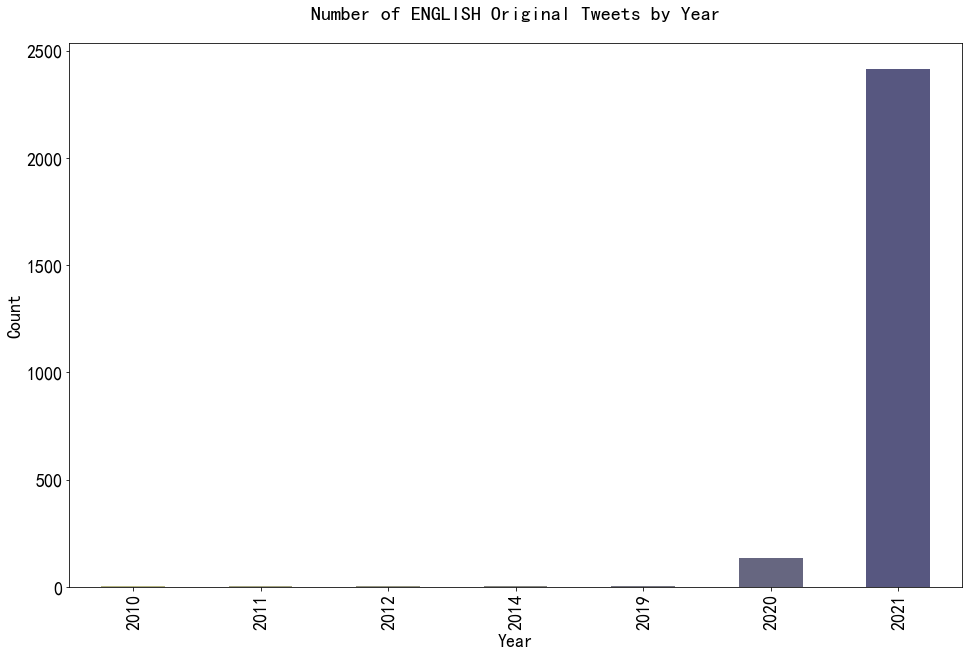

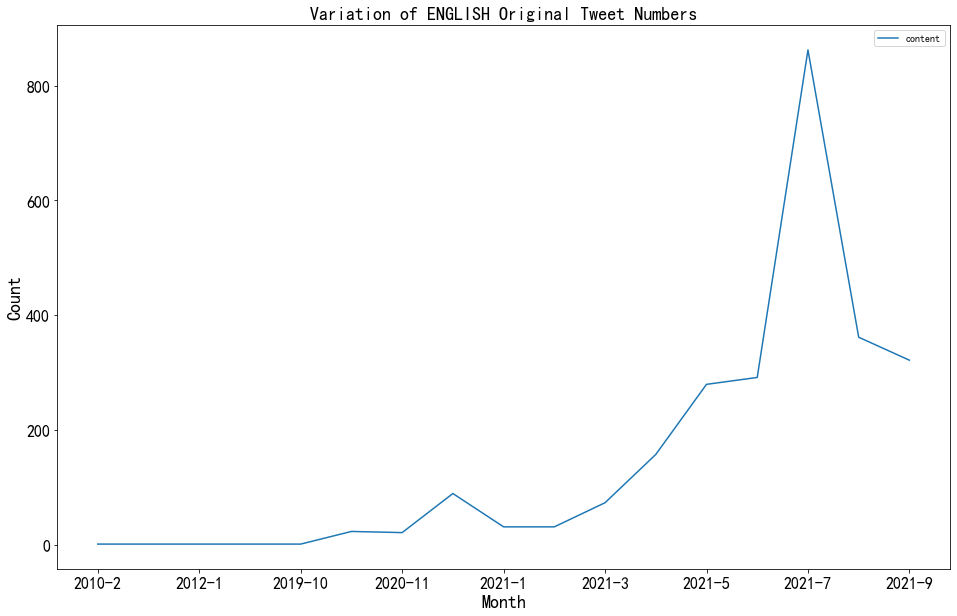

In [68]:
import matplotlib.pyplot as plt
# Number of tweets by year
colors = []
for i in range(2020-2010+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = eng["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of ENGLISH Original Tweets by Year\n", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Count", fontsize=18)
bar.tick_params(labelsize=14)
bar.tick_params(labelsize=18)
plt.show()

# Number of tweets (more details)
eng["year_month"] = eng["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))
# eng["year_month"] = pd.to_datetime(eng["year_month"])
year_month = pd.pivot_table(eng, values = "content", index = "year_month", aggfunc = "count")

bar = year_month.plot(figsize = (16,10))
plt.title("Variation of ENGLISH Original Tweet Numbers", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Count", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

In [69]:
#eng.to_csv('/Users/patricia/Downloads/english_original.csv')

### 基于原帖内容的情感打分，随时间维度变化

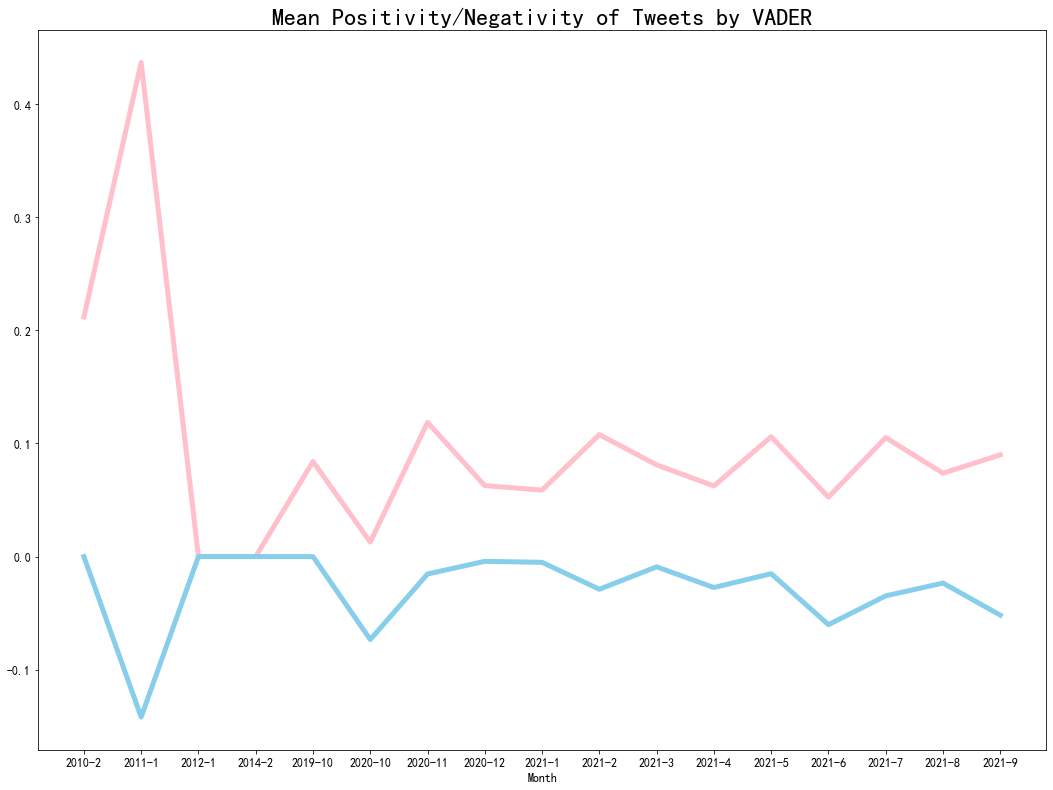

In [70]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of Tweets by VADER", fontsize=24)
ax.tick_params(labelsize=14)

# Positivity plot
year_month = pd.pivot_table(eng, values = "vader_pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

# Negativity plot
year_month = pd.pivot_table(eng, values = "vader_neg", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")
plt.xlabel("Month", fontsize=12)

ax.tick_params(labelsize=12)
plt.show()

In [71]:
count_vader=pd.DataFrame(eng.groupby(["year_month","comp_score"]).count()["vader_comp"])
count_vader

vader_comp
year_month comp_score            
2010-2     pos                  2
2011-1     pos                  2
2012-1     neu                  2
2014-2     neu                  2
2019-10    pos                  2
2020-10    neg                  4
           neu                 16
           pos                  4
2020-11    neu                  8
           pos                 14
2020-12    neg                  2
           neu                 34
           pos                 54
2021-1     neu                 18
           pos                 14
2021-2     neg                  4
           neu                  6
           pos                 22
2021-3     neg                  6
           neu                 32
           pos                 36
2021-4     neg                 22
           neu                 68
           pos                 68
2021-5     neg                 30
           neu                 70
           pos                180
2021-6     neg                 92
           neu                100
           pos                100
2021-7     neg                108
           neu                254
           pos                500
2021-8     neg                 50
           neu                142
           pos                170
2021-9     neg                 66
           neu                142
           pos                114

In [72]:
sum_vader=pd.DataFrame(eng.groupby(["year_month","comp_score"])["vader_comp"].sum())
sum_vader
#sum_vader.to_csv('/Users/patricia/Downloads/english_original_vader.csv'

vader_comp
year_month comp_score            
2010-2     pos             1.0212
2011-1     pos             1.5300
2012-1     neu             0.0000
2014-2     neu             0.0000
2019-10    pos             1.0502
2020-10    neg            -1.7262
           neu             0.0000
           pos             0.8854
2020-11    neu             0.0000
           pos             6.9490
2020-12    neg            -0.2560
           neu             0.0000
           pos            16.2504
2021-1     neu             0.0000
           pos             6.1034
2021-2     neg            -1.3430
           neu             0.0000
           pos            11.3604
2021-3     neg            -0.6162
           neu             0.0000
           pos            16.3216
2021-4     neg           -10.2324
           neu             0.0000
           pos            26.4262
2021-5     neg            -9.3616
           neu             0.0000
           pos            69.7260
2021-6     neg           -48.3192
           neu             0.0000
           pos            41.9406
2021-7     neg           -37.2010
           neu             0.0000
           pos           209.5240
2021-8     neg           -17.6502
           neu             0.0000
           pos            71.3802
2021-9     neg           -27.3358
           neu             0.0000
           pos            55.8524

In [73]:
mean_vader=pd.DataFrame(eng.groupby(["year_month","comp_score"])["vader_comp"].mean())
mean_vader

vader_comp
year_month comp_score            
2010-2     pos           0.510600
2011-1     pos           0.765000
2012-1     neu           0.000000
2014-2     neu           0.000000
2019-10    pos           0.525100
2020-10    neg          -0.431550
           neu           0.000000
           pos           0.221350
2020-11    neu           0.000000
           pos           0.496357
2020-12    neg          -0.128000
           neu           0.000000
           pos           0.300933
2021-1     neu           0.000000
           pos           0.435957
2021-2     neg          -0.335750
           neu           0.000000
           pos           0.516382
2021-3     neg          -0.102700
           neu           0.000000
           pos           0.453378
2021-4     neg          -0.465109
           neu           0.000000
           pos           0.388621
2021-5     neg          -0.312053
           neu           0.000000
           pos           0.387367
2021-6     neg          -0.525209
           neu           0.000000
           pos           0.419406
2021-7     neg          -0.344454
           neu           0.000000
           pos           0.419048
2021-8     neg          -0.353004
           neu           0.000000
           pos           0.419884
2021-9     neg          -0.414179
           neu           0.000000
           pos           0.489933

In [74]:
weighted=pd.merge(sum_vader,count_vader,on="year_month",suffixes=('_sum','_count'))
weighted["weighted"]=weighted["vader_comp_sum"]*weighted["vader_comp_count"]
weighted

vader_comp_sum  vader_comp_count   weighted
year_month                                             
2010-2              1.0212                 2     2.0424
2011-1              1.5300                 2     3.0600
2012-1              0.0000                 2     0.0000
2014-2              0.0000                 2     0.0000
2019-10             1.0502                 2     2.1004
...                    ...               ...        ...
2021-9              0.0000               142     0.0000
2021-9              0.0000               114     0.0000
2021-9             55.8524                66  3686.2584
2021-9             55.8524               142  7931.0408
2021-9             55.8524               114  6367.1736

[103 rows x 3 columns]

In [75]:
sum_vader=pd.DataFrame(eng.groupby(["year_month"])["vader_comp"].sum())

### 基于点赞评论转发数 展示原帖总体关注度

In [76]:
eng["cnt_agree"]=eng["cnt_agree"].apply(lambda x: int(x))
eng["cnt_comment"]=eng["cnt_comment"].apply(lambda x: int(x))
eng["cnt_retweet"]=eng["cnt_retweet"].apply(lambda x: int(x))

In [77]:
a=eng.groupby(["year_month"]).sum()["cnt_agree"]
c=eng.groupby(["year_month"]).sum()["cnt_comment"]
r=eng.groupby(["year_month"]).sum()["cnt_retweet"]
print("max number "+str(max(a))+" of agrees appears in ",pd.DataFrame(a).index[list(a).index(max(a))])
print("max number "+str(max(c))+" of comments appears in ",pd.DataFrame(c).index[list(c).index(max(c))])
print("max number "+str(max(r))+" of retweets appears in ",pd.DataFrame(r).index[list(r).index(max(r))])

max number 5992 of agrees appears in  2021-7
max number 586 of comments appears in  2021-7
max number 1900 of retweets appears in  2021-7


In [78]:
agrees = pd.pivot_table(eng, values = "cnt_agree", index = "year_month", aggfunc = "sum")
comments = pd.pivot_table(eng, values = "cnt_comment", index = "year_month", aggfunc = "sum")
retweets = pd.pivot_table(eng, values = "cnt_retweet", index = "year_month", aggfunc = "sum")

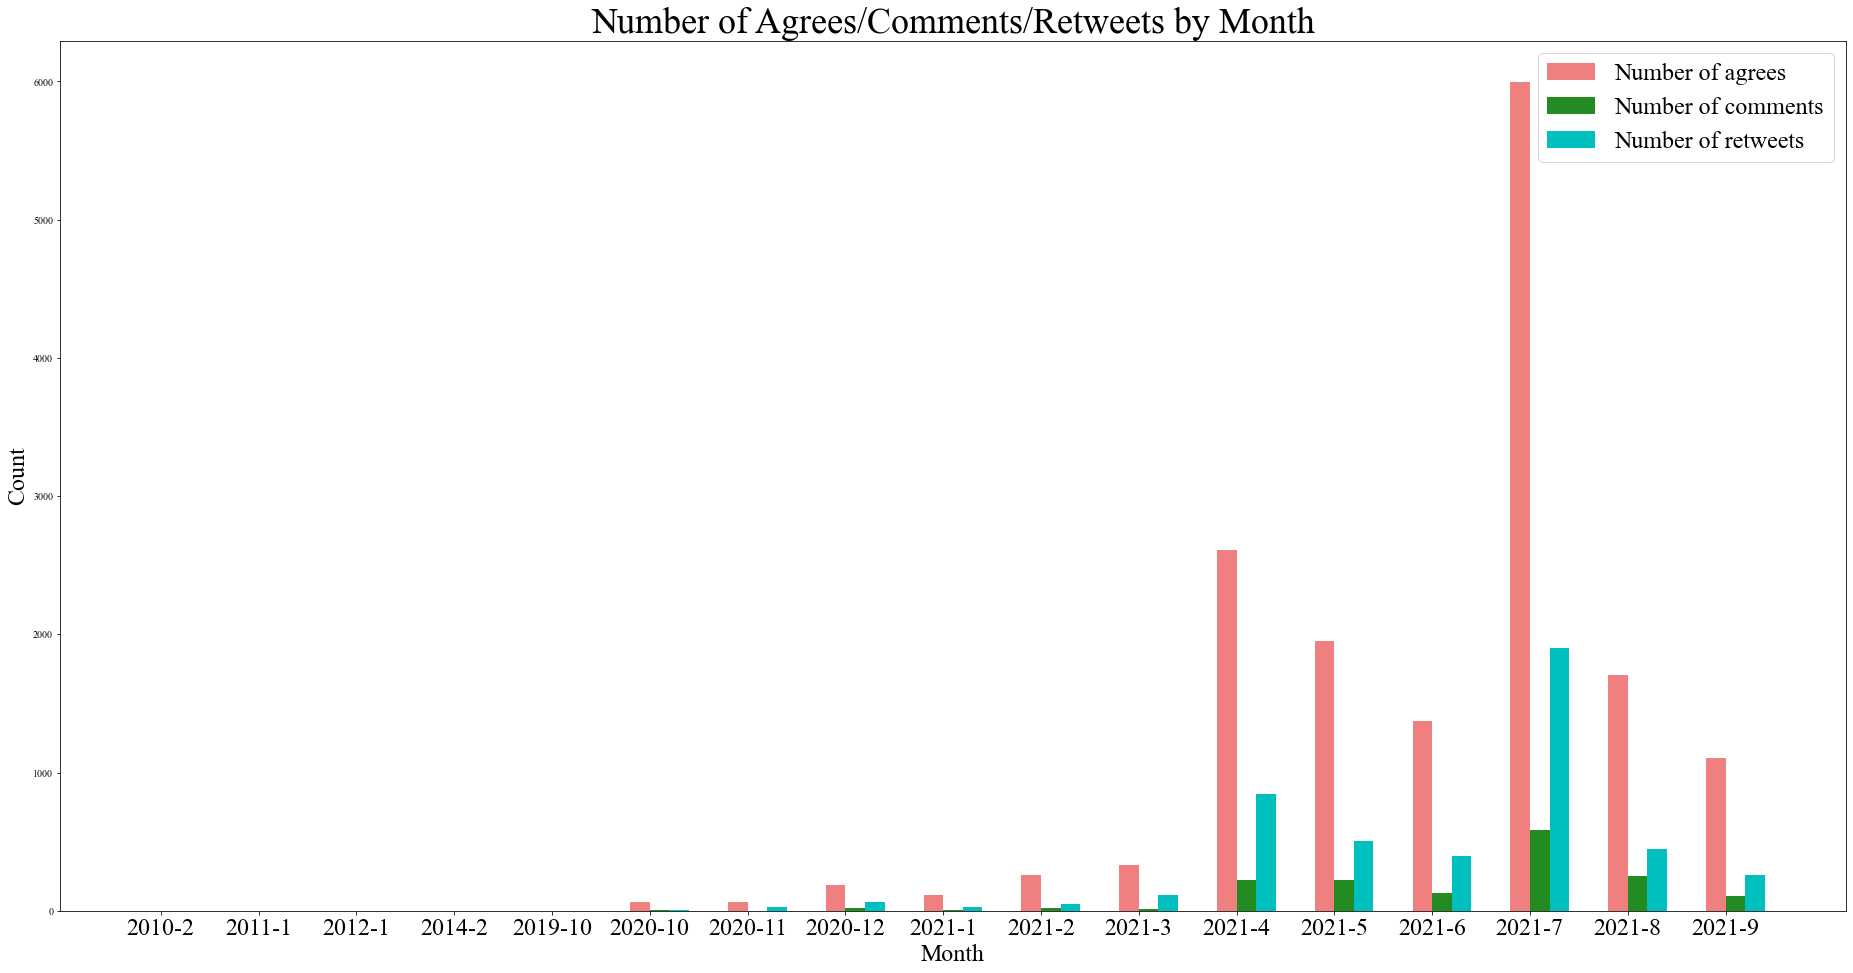

In [79]:
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.sans-serif'] = 'Times New Roman'

x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，因为是两个产品，所以第二个产品应该在第一个条形图往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees.values.ravel()),width=w,color="lightcoral",label="Number of agrees")
ax.bar(x2,np.array(comments.values.ravel()),width=w,color="forestgreen",label="Number of comments")
ax.bar(x3,np.array(retweets.values.ravel()),width=w,color="c",label="Number of retweets")

ax.set_title("Number of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.2/2,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.show()

可以观察到，总体关注度集中在2021-07，收到的点赞、评论、转发数最多。
但考虑没有考虑到原帖数量，本身2021年收集到的帖文数量就最多

接下来考虑到每月发布条数，按比例对比：

In [80]:
count_month=eng["year_month"].value_counts(dropna=True).sort_index()
count_month=pd.DataFrame(count_month).rename(columns={'year_month':"Count"})
count_month

Count
2010-2       2
2011-1       2
2012-1       2
2014-2       2
2019-10      2
2020-10     24
2020-11     22
2020-12     90
2021-1      32
2021-2      32
2021-3      74
2021-4     158
2021-5     280
2021-6     292
2021-7     862
2021-8     362
2021-9     322

In [81]:
agree_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((agrees[agrees.index==str(i)]["cnt_agree"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    agree_rela.append(relative)

In [82]:
agree_rela=pd.DataFrame(agree_rela,columns=["agree_rela"],index=count_month.index)
agrees.insert(1,"agree_rela",agree_rela)
agrees

cnt_agree  agree_rela
year_month                       
2010-2              0        0.00
2011-1              0        0.00
2012-1              0        0.00
2014-2              0        0.00
2019-10             0        0.00
2020-10            66        2.75
2020-11            64        2.91
2020-12           184        2.04
2021-1            112        3.50
2021-2            262        8.19
2021-3            328        4.43
2021-4           2612       16.53
2021-5           1952        6.97
2021-6           1376        4.71
2021-7           5992        6.95
2021-8           1708        4.72
2021-9           1102        3.42

In [83]:
comment_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((comments[comments.index==str(i)]["cnt_comment"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    comment_rela.append(relative)
    
comment_rela=pd.DataFrame(comment_rela,columns=["comment_rela"],index=count_month.index)
comments.insert(1,"comment_rela",comment_rela)
comments

cnt_comment  comment_rela
year_month                           
2010-2                0          0.00
2011-1                0          0.00
2012-1                0          0.00
2014-2                0          0.00
2019-10               2          1.00
2020-10               8          0.33
2020-11               2          0.09
2020-12              18          0.20
2021-1                6          0.19
2021-2               22          0.69
2021-3               16          0.22
2021-4              220          1.39
2021-5              226          0.81
2021-6              130          0.45
2021-7              586          0.68
2021-8              250          0.69
2021-9              110          0.34

In [84]:
retweet_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((retweets[retweets.index==str(i)]["cnt_retweet"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    retweet_rela.append(relative)
    
retweet_rela=pd.DataFrame(retweet_rela,columns=["retweet_rela"],index=count_month.index)
retweets.insert(1,"retweet_rela",retweet_rela)
retweets

cnt_retweet  retweet_rela
year_month                           
2010-2                0          0.00
2011-1                0          0.00
2012-1                0          0.00
2014-2                0          0.00
2019-10               0          0.00
2020-10               6          0.25
2020-11              26          1.18
2020-12              66          0.73
2021-1               28          0.88
2021-2               52          1.62
2021-3              112          1.51
2021-4              844          5.34
2021-5              502          1.79
2021-6              394          1.35
2021-7             1900          2.20
2021-8              446          1.23
2021-9              258          0.80

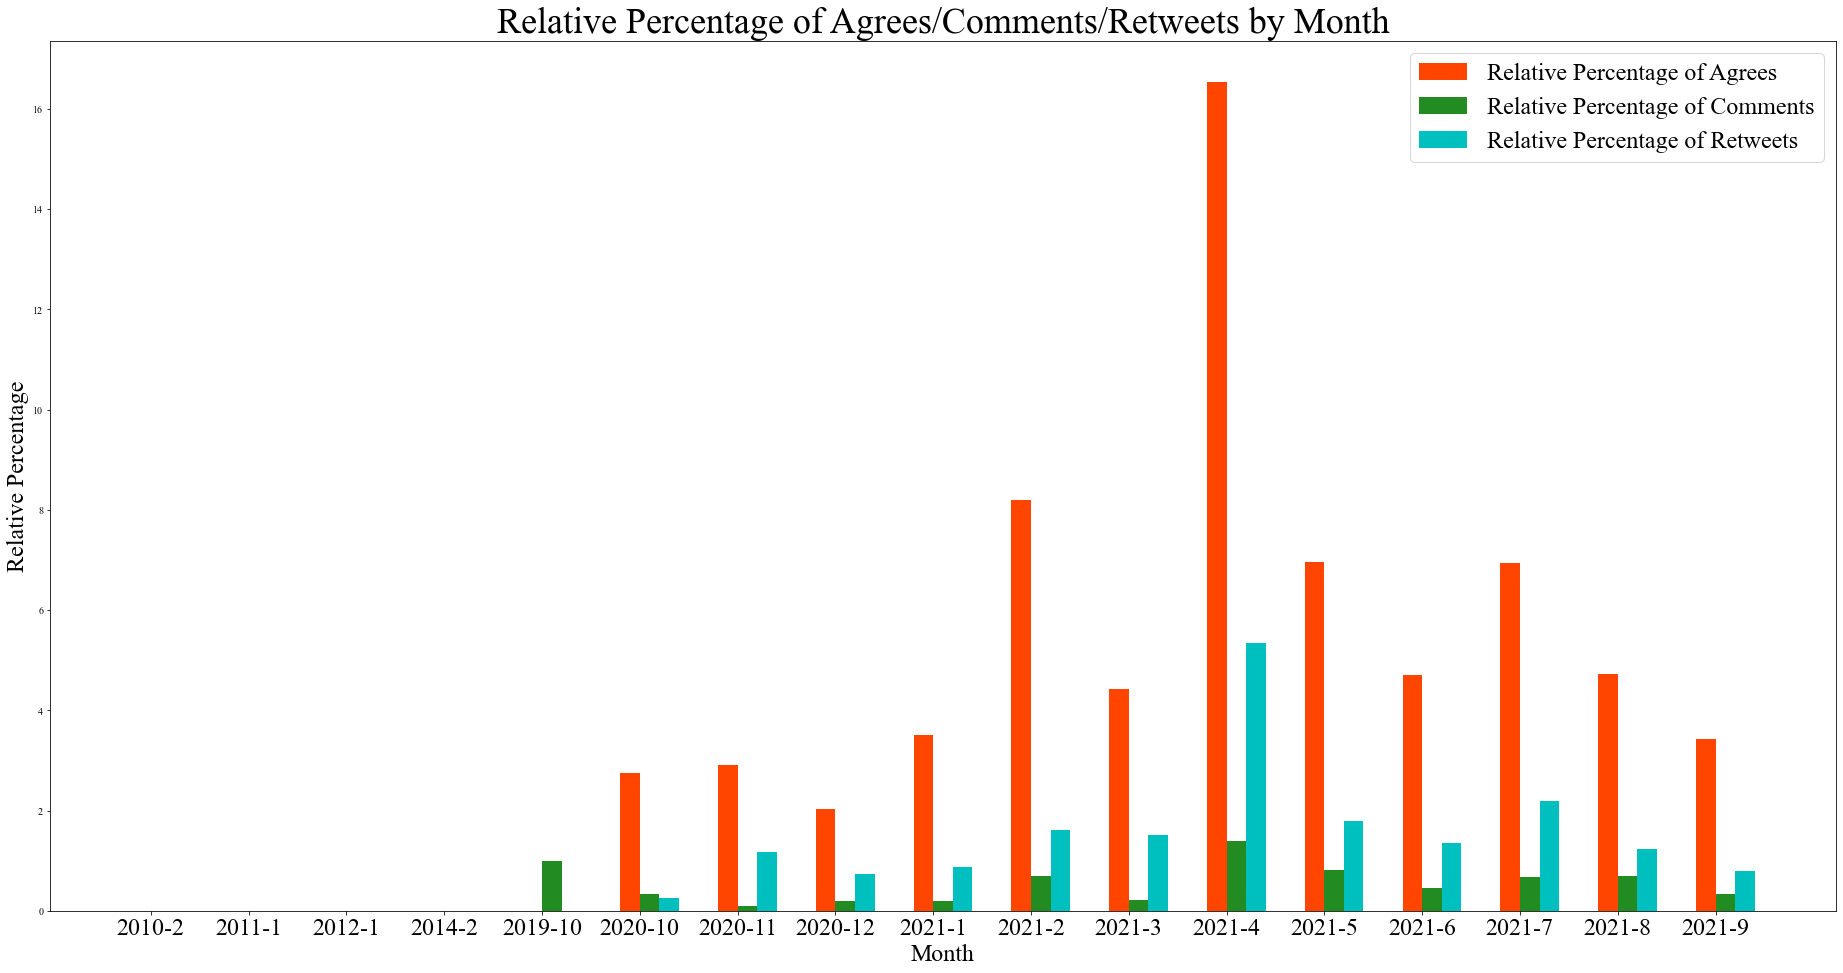

In [85]:
x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，第二个条形图在第一个条形图往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees["agree_rela"]),width=w,color="orangered",label="Relative Percentage of Agrees")
ax.bar(x2,np.array(comments["comment_rela"]),width=w,color="forestgreen",label="Relative Percentage of Comments")
ax.bar(x3,np.array(retweets["retweet_rela"]),width=w,color="c",label="Relative Percentage of Retweets")

ax.set_title("Relative Percentage of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.2/2,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.show()

根据原帖点赞、评论、转发数的相对比例，可以观察到关注度集中在2021年4月。

#### 原帖的用户帖文比例

In [86]:
cnt=eng.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=eng.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month
cnt_to_usr

year_month
2010-2     1.000000
2011-1     1.000000
2012-1     1.000000
2014-2     1.000000
2019-10    1.000000
2020-10    1.333333
2020-11    1.100000
2020-12    1.097561
2021-1     1.000000
2021-2     1.000000
2021-3     1.321429
2021-4     1.179104
2021-5     1.166667
2021-6     1.258621
2021-7     1.322086
2021-8     1.292857
2021-9     1.694737
dtype: float64

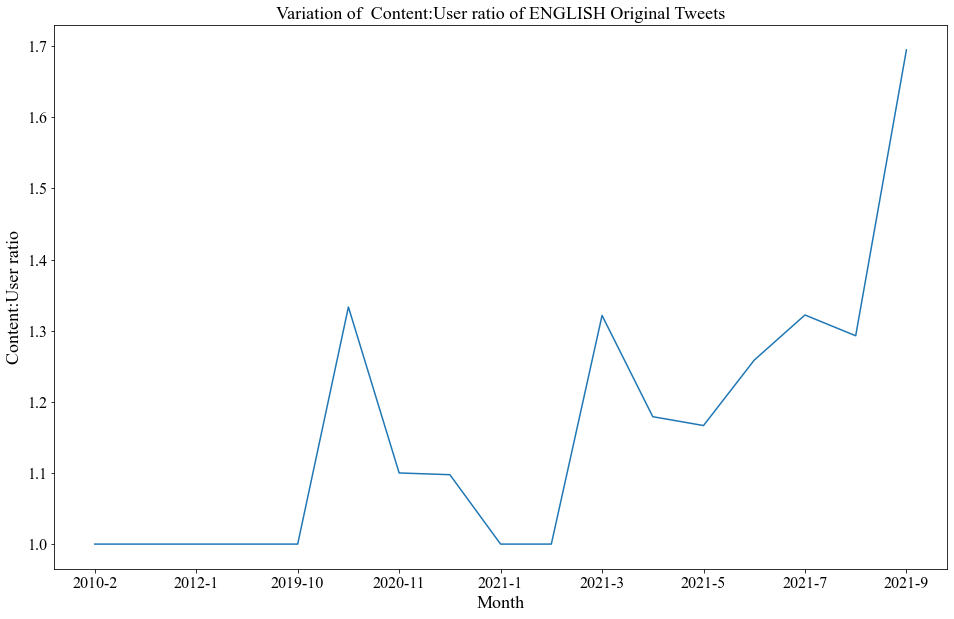

In [87]:
bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User ratio of ENGLISH Original Tweets", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

In [88]:
data_original_eng=eng[["cnt_agree", "cnt_comment", "cnt_retweet","comp_score"]]
original_eng=eng[["content","cnt_agree", "cnt_comment", "cnt_retweet","comp_score"]]

### Twitter中文原帖
点赞、评论、转发数反映正负情感关注度


In [89]:
import re
import string
import emoji

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation.'''
    text = str(text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\【.*?\】', '', text)
    text = re.sub('\《.*?\》', '', text)
    text = re.sub(r"#",'', text)
    text = re.sub(r"•",'', text)
    text = re.sub(r"（",'', text)
    text = re.sub(r"）",'', text)
    text = re.sub(r"『",'', text)
    text = re.sub(r"』",'', text)
    text = re.sub(r"“",'', text)
    text = re.sub(r"”",'', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    #text = re.sub(r'\W+', '', text)
    #text = re.sub('[^%&,;=?$\x22]', '', text)
    text = re.sub("[a-zA-Z0-9]", "", text)
    text = re.sub(r'\b\w{1,2}\b', "", text) # removes remaining one-letter words and two letters words 
    text = re.sub(r"[ \t]{2,}", "", text)
    return text 


emoji_pattern = re.compile("["
    u'[\uD800-\uDBFF][\uDC00-\uDFFF]'
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

def demojized(text):
    text = emoji.demojize(text)
    return text

original_chi["content"] = original_chi["content"].apply(lambda x : demojized(x))
original_chi["content"] = original_chi["content"].apply(lambda x : remove_emoji(x))
original_chi["content"] = original_chi["content"].apply(lambda x : clean_text(x))
original_chi["content"]

<ipython-input-89-62d47a8d575a>:37: FutureWarning: Possible nested set at position 1
  emoji_pattern = re.compile("["


27       偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...
28       比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...
29       央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...
30                                   凯尔巴斯：。它就是一个现代数字特洛伊木马。
32       周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...
                               ...                        
22096            中国建行展示数字人民币在飞机上离线支付中国数字人民币正大踏步走进中国人民的生活中 
22097                                 中共加速推动数字人民币美联储：在美行不通
22098            澳大利亚 – 美方称数字人民币不会取代美元，因为美国掌握一砝码组图  澳洲唐人街 
22099                       中国开始试行用数字人民币支付工资禁闻网人民币数字货币移动支付
22104     美国证券交易委员会的一位高级官员周四表示，中国计划中的数字人民币不会取代美元让美元贬值，理...
Name: content, Length: 4567, dtype: object

In [90]:
original_chi['len'] = original_chi['content'].apply(lambda x:len(x))
original_chi=original_chi[original_chi['len']>1]

In [91]:
text=original_chi.copy()

# 加载常用停用词
stopwords1 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/中文停用词库.txt', 'r', encoding='utf-8')]
stopwords2 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/哈工大停用词表.txt', 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/四川大学机器智能实验室停用词库.txt', 'r', encoding='utf-8')]
stopwords4 = [line.rstrip() for line in open('/Users/patricia/Downloads/stopwords/stopwords.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3 + stopwords4

In [92]:
from snownlp import SnowNLP
def compute_snownlp_scores(df, label):
    df["snownlp_scores"] = df[label].apply(lambda x: SnowNLP(x).sentiments)
    return df
sentiment = compute_snownlp_scores(text, "content")

In [93]:
def compute_snownlp_senti(df,refer):
    df["snownlp_senti"] = df[refer].apply(lambda x: "pos" if x>0.8 else ('neg' if x<0.5 else 'neu'))
    return df
sentiment = compute_snownlp_senti(sentiment, "snownlp_scores")
chi=sentiment.copy()
sentiment[:1]

userid                                            content  \
27  liangshaohua  偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...   

   publish_time page_action_type               relevant_topic_guid  \
27   2021-05-22               07  8b0e006b3d1e1b12dacc442c9944a203   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
27  8b0e006b3d1e1b12dacc442c9944a203        14           0           0   

   dayofweek language  len  snownlp_scores snownlp_senti  
27  Saturday       zh  135        0.001897           neg

In [94]:
percent_pos = round(100*sentiment[sentiment['snownlp_senti']=="pos"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neu = round(100*sentiment[sentiment['snownlp_senti']=="neu"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neg = round(100*sentiment[sentiment['snownlp_senti']=="neg"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)

print(str(percent_pos) + "% 的中文原帖被SnowNLP分类为正面情感")
print(str(percent_neg) + "% 的中文原帖被SnowNLP分类为负面情感")

66.5% 的中文原帖被SnowNLP分类为正面情感
19.35% 的中文原帖被SnowNLP分类为负面情感


In [95]:
chi.publish_time.max(),chi.publish_time.min()

(Timestamp('2021-09-27 00:00:00'), Timestamp('2019-09-12 00:00:00'))

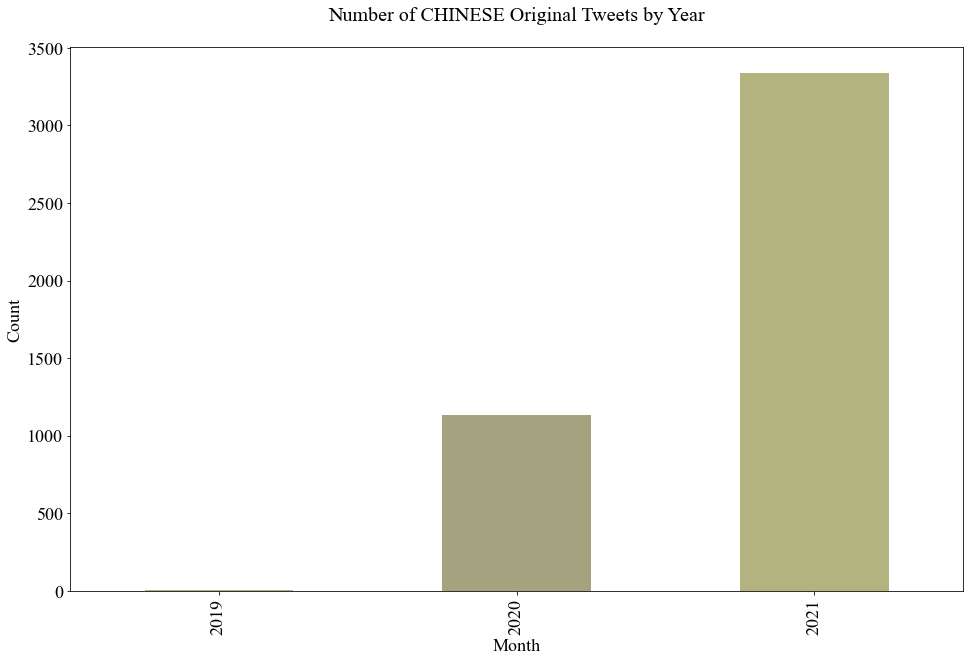

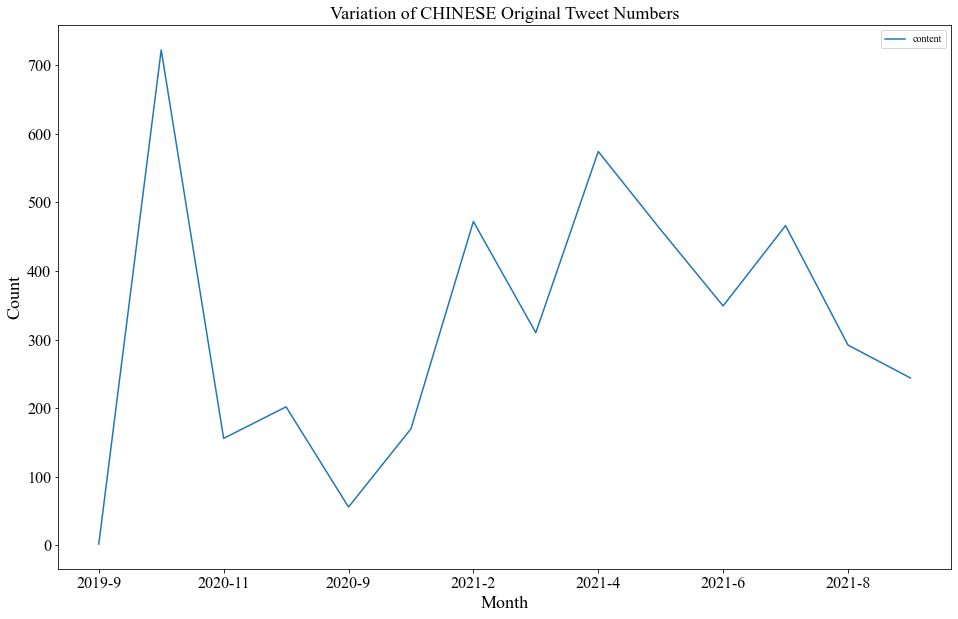

In [96]:
# Number of tweets by year
colors = []
for i in range(2020-2019+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = chi["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of CHINESE Original Tweets by Year\n", fontsize=20)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Count",fontsize=18)
bar.tick_params(labelsize=14)
bar.tick_params(labelsize=18)
plt.show()

# Number of tweets (more details)
chi["year_month"] = chi["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))
# eng["year_month"] = pd.to_datetime(eng["year_month"])
year_month = pd.pivot_table(chi, values = "content", index = "year_month", aggfunc = "count")

bar = year_month.plot(figsize = (16,10))
plt.title("Variation of CHINESE Original Tweet Numbers", fontsize=18)
bar.tick_params(labelsize=16)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Count",fontsize=18)

bar.get_yaxis().set_visible(True)
plt.show()

In [97]:
#chi.to_csv('/Users/patricia/Downloads/chinese_original.csv')

### 基于原帖内容的情感打分，随时间维度变化

In [98]:
chi

userid                                            content  \
27        liangshaohua  偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...   
28          mc64122225  比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...   
29          myfxtrader  央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...   
30     MilesSm41692872                              凯尔巴斯：。它就是一个现代数字特洛伊木马。   
32     K7kV30bYi00LDCC  周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...   
...                ...                                                ...   
22096  sunnyshining888          中国建行展示数字人民币在飞机上离线支付中国数字人民币正大踏步走进中国人民的生活中    
22097      benchrstina                               中共加速推动数字人民币美联储：在美行不通   
22098     china_com_au          澳大利亚 – 美方称数字人民币不会取代美元，因为美国掌握一砝码组图  澳洲唐人街    
22099      bannedebook                     中国开始试行用数字人民币支付工资禁闻网人民币数字货币移动支付   
22104       TimednewsC   美国证券交易委员会的一位高级官员周四表示，中国计划中的数字人民币不会取代美元让美元贬值，理...   

      publish_time page_action_type               relevant_topic_guid  \
27      2021-05-22               07  8b0e006b3d1e1b12dacc442c9944a203   
28      2021-05-22               07  19dcdc789a15d964901b7261c2235406   
29      2021-05-22               07  1dab8b3b2484ca3cd1d75b2c92249104   
30      2021-05-22               07  ad8b7b7928e7a4473be56c390680eadf   
32      2021-05-22               07  f130a23599cb1df88eecffcec1c5a25c   
...            ...              ...                               ...   
22096   2021-04-30               07  2431433371713102a15bbc6464568bc7   
22097   2021-05-01               07  85adc24657b57cf3cf8e9a14cd023eaf   
22098   2021-05-01               07  b2834842a1f4f8da957cd749fd8343d3   
22099   2021-04-30               07  4fcb41facc2b278b6c0ee433d7f4ef75   
22104   2021-04-30               07  9aa1c64a279bd290abae59ff49721c05   

                             topic_guid cnt_agree cnt_comment cnt_retweet  \
27     8b0e006b3d1e1b12dacc442c9944a203        14           0           0   
28     19dcdc789a15d964901b7261c2235406         5           0           9   
29     1dab8b3b2484ca3cd1d75b2c92249104         1           2           0   
30     ad8b7b7928e7a4473be56c390680eadf         0           0           0   
32     f130a23599cb1df88eecffcec1c5a25c         0           0           0   
...                                 ...       ...         ...         ...   
22096  2431433371713102a15bbc6464568bc7         1           0           0   
22097  85adc24657b57cf3cf8e9a14cd023eaf         1           0           0   
22098  b2834842a1f4f8da957cd749fd8343d3         0           0           0   
22099  4fcb41facc2b278b6c0ee433d7f4ef75         5           1           2   
22104  9aa1c64a279bd290abae59ff49721c05         0           0           0   

      dayofweek language  len  snownlp_scores snownlp_senti year_month  
27     Saturday       zh  135        0.001897           neg     2021-5  
28     Saturday       zh   53        0.995100           pos     2021-5  
29     Saturday       zh  113        0.010158           neg     2021-5  
30     Saturday       zh   21        0.883457           pos     2021-5  
32     Saturday       zh   59        0.999999           pos     2021-5  
...         ...      ...  ...             ...           ...        ...  
22096    Friday       zh   41        0.999603           pos     2021-4  
22097  Saturday       zh   20        0.911750           pos     2021-5  
22098  Saturday       zh   41        0.994379           pos     2021-5  
22099    Friday       zh   30        0.938494           pos     2021-4  
22104    Friday       zh   95        0.999875           pos     2021-4  

[4475 rows x 15 columns]

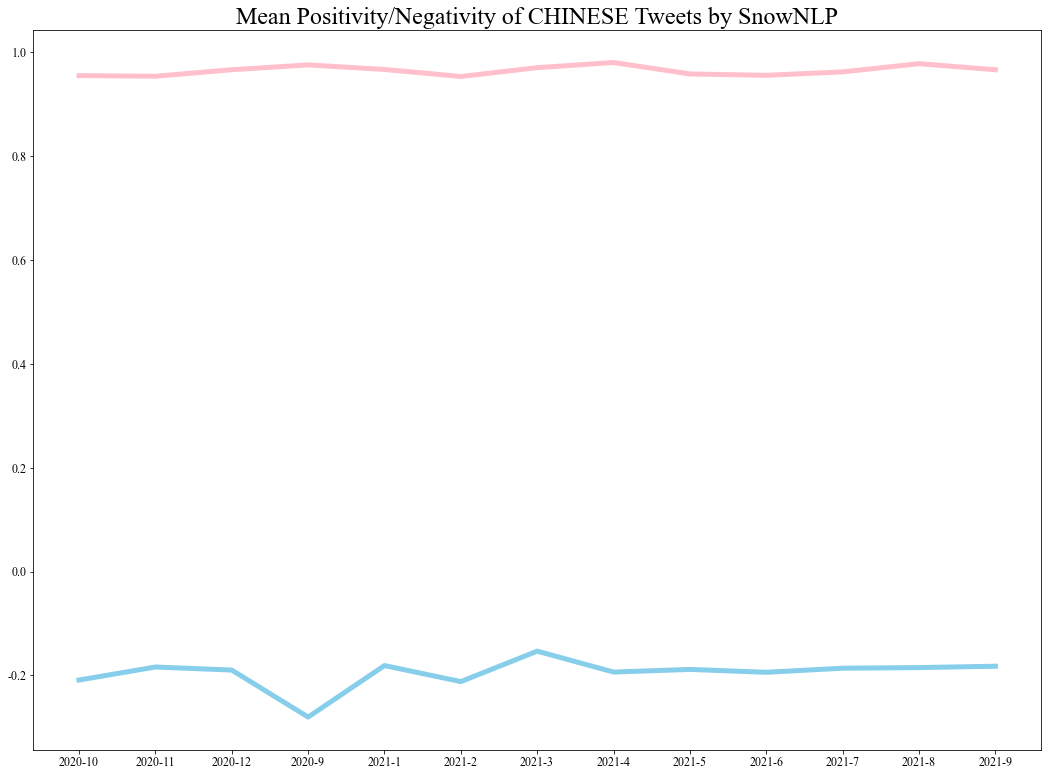

In [99]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of CHINESE Tweets by SnowNLP", fontsize=24)
ax.tick_params(labelsize=14)

chi_pos=chi[chi["snownlp_senti"]=="pos"]
# Positivity plot
year_month = pd.pivot_table(chi_pos, values = "snownlp_scores", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

chi_neg=chi[chi["snownlp_senti"]=="neg"]
# Negativity plot
year_month = pd.pivot_table(chi_neg, values = "snownlp_scores", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")


ax.tick_params(labelsize=12)
plt.show()

### 基于点赞评论转发数 分析原帖总体关注度

In [100]:
chi["cnt_agree"]=chi["cnt_agree"].apply(lambda x: int(x))
chi["cnt_comment"]=chi["cnt_comment"].apply(lambda x: int(x))
chi["cnt_retweet"]=chi["cnt_retweet"].apply(lambda x: int(x))

In [101]:
a=chi.groupby(["year_month"]).sum()["cnt_agree"]
c=chi.groupby(["year_month"]).sum()["cnt_comment"]
r=chi.groupby(["year_month"]).sum()["cnt_retweet"]
print("max number "+str(max(a))+" of agrees appears in ",pd.DataFrame(a).index[list(a).index(max(a))])
print("max number "+str(max(c))+" of comments appears in ",pd.DataFrame(c).index[list(c).index(max(c))])
print("max number "+str(max(r))+" of retweets appears in ",pd.DataFrame(r).index[list(r).index(max(r))])

max number 5684 of agrees appears in  2020-10
max number 1004 of comments appears in  2020-10
max number 1792 of retweets appears in  2020-10


In [102]:
agrees = pd.pivot_table(chi, values = "cnt_agree", index = "year_month", aggfunc = "sum")
comments = pd.pivot_table(chi, values = "cnt_comment", index = "year_month", aggfunc = "sum")
retweets = pd.pivot_table(chi, values = "cnt_retweet", index = "year_month", aggfunc = "sum")

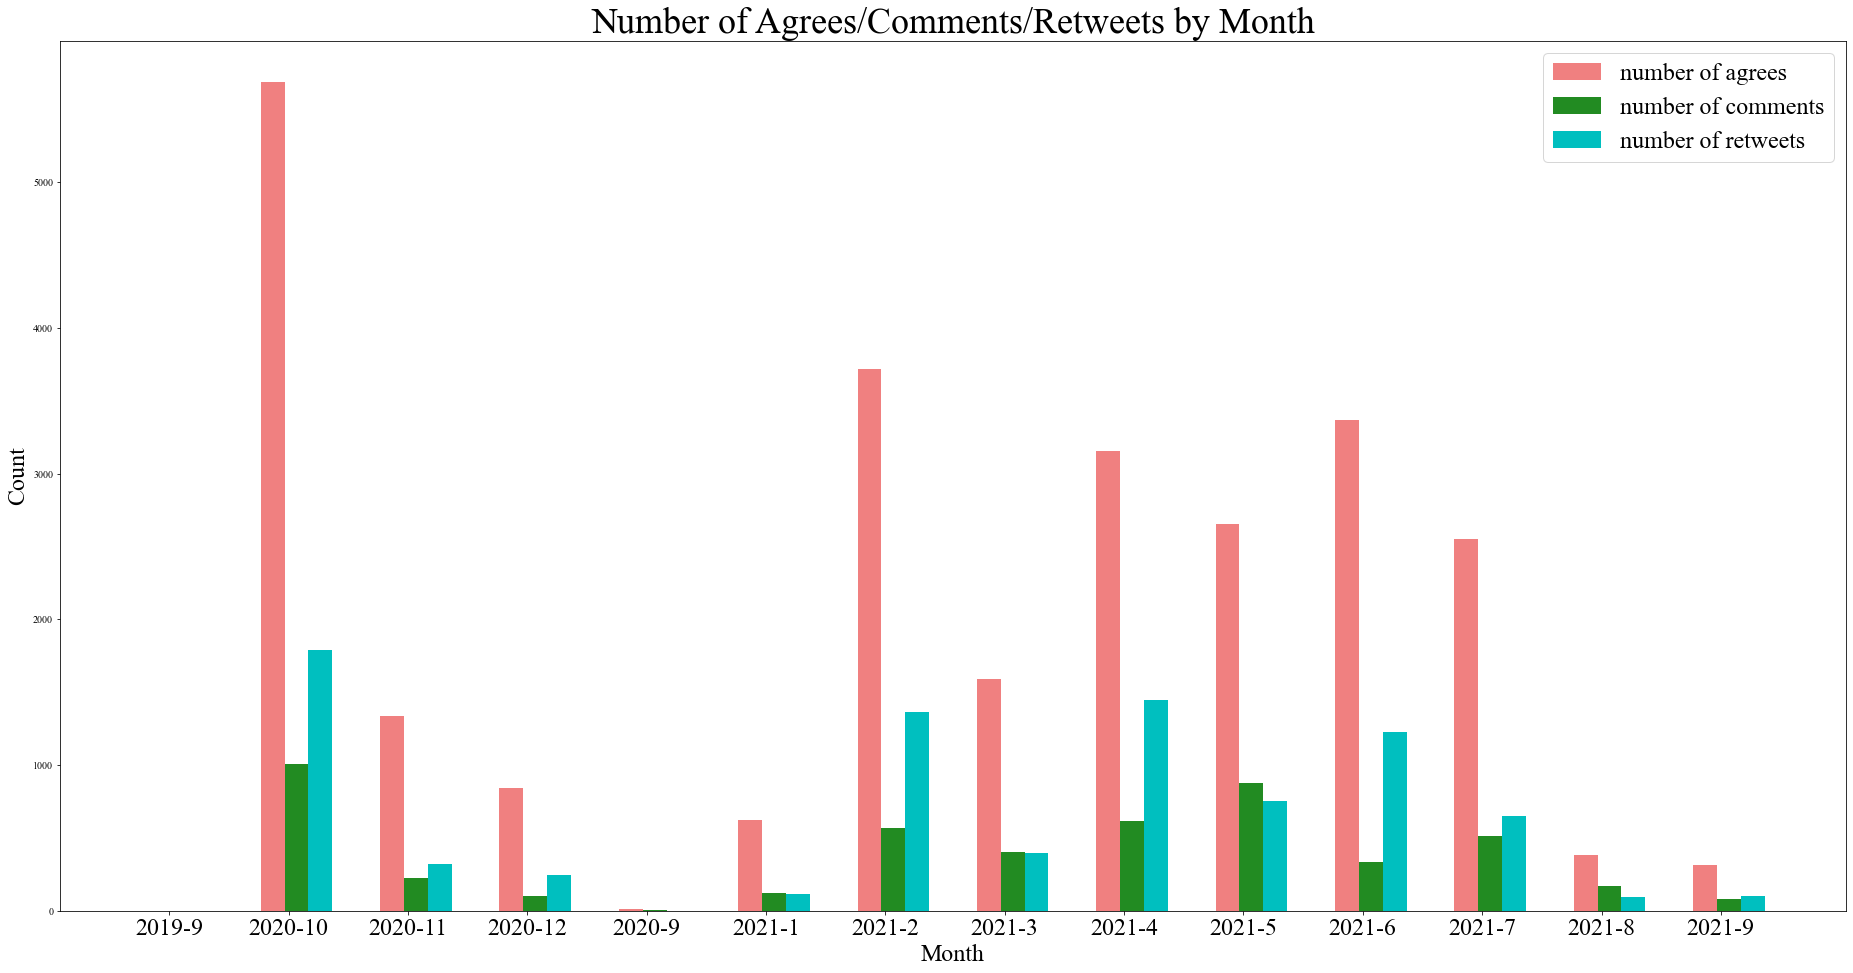

In [103]:
x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，第二个条形图在第一个的往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees.values.ravel()),width=w,color="lightcoral",label="number of agrees")
ax.bar(x2,np.array(comments.values.ravel()),width=w,color="forestgreen",label="number of comments")
ax.bar(x3,np.array(retweets.values.ravel()),width=w,color="c",label="number of retweets")

ax.set_title("Number of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.4/3,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)

plt.legend(loc='upper right',fontsize=24)
plt.show()

In [104]:
count_month=chi["year_month"].value_counts(dropna=True).sort_index()
count_month=pd.DataFrame(count_month).rename(columns={'year_month':"Count"})

agree_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((agrees[agrees.index==str(i)]["cnt_agree"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    agree_rela.append(relative)

agree_rela=pd.DataFrame(agree_rela,columns=["agree_rela"],index=count_month.index)
agrees.insert(1,"agree_rela",agree_rela)


comment_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((comments[comments.index==str(i)]["cnt_comment"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    comment_rela.append(relative)
    
comment_rela=pd.DataFrame(comment_rela,columns=["comment_rela"],index=count_month.index)
comments.insert(1,"comment_rela",comment_rela)

retweet_rela=[]
for i in count_month.index:
    #print(i)
    #print(agrees[agrees.index==str(i)]["cnt_agree"][0])
    #print(count_month[count_month.index==str(i)]["Count"].values[0])
    relative=round((retweets[retweets.index==str(i)]["cnt_retweet"][0])/(count_month[count_month.index==str(i)]["Count"].values[0]),2)
    retweet_rela.append(relative)
    
retweet_rela=pd.DataFrame(retweet_rela,columns=["retweet_rela"],index=count_month.index)
retweets.insert(1,"retweet_rela",retweet_rela)

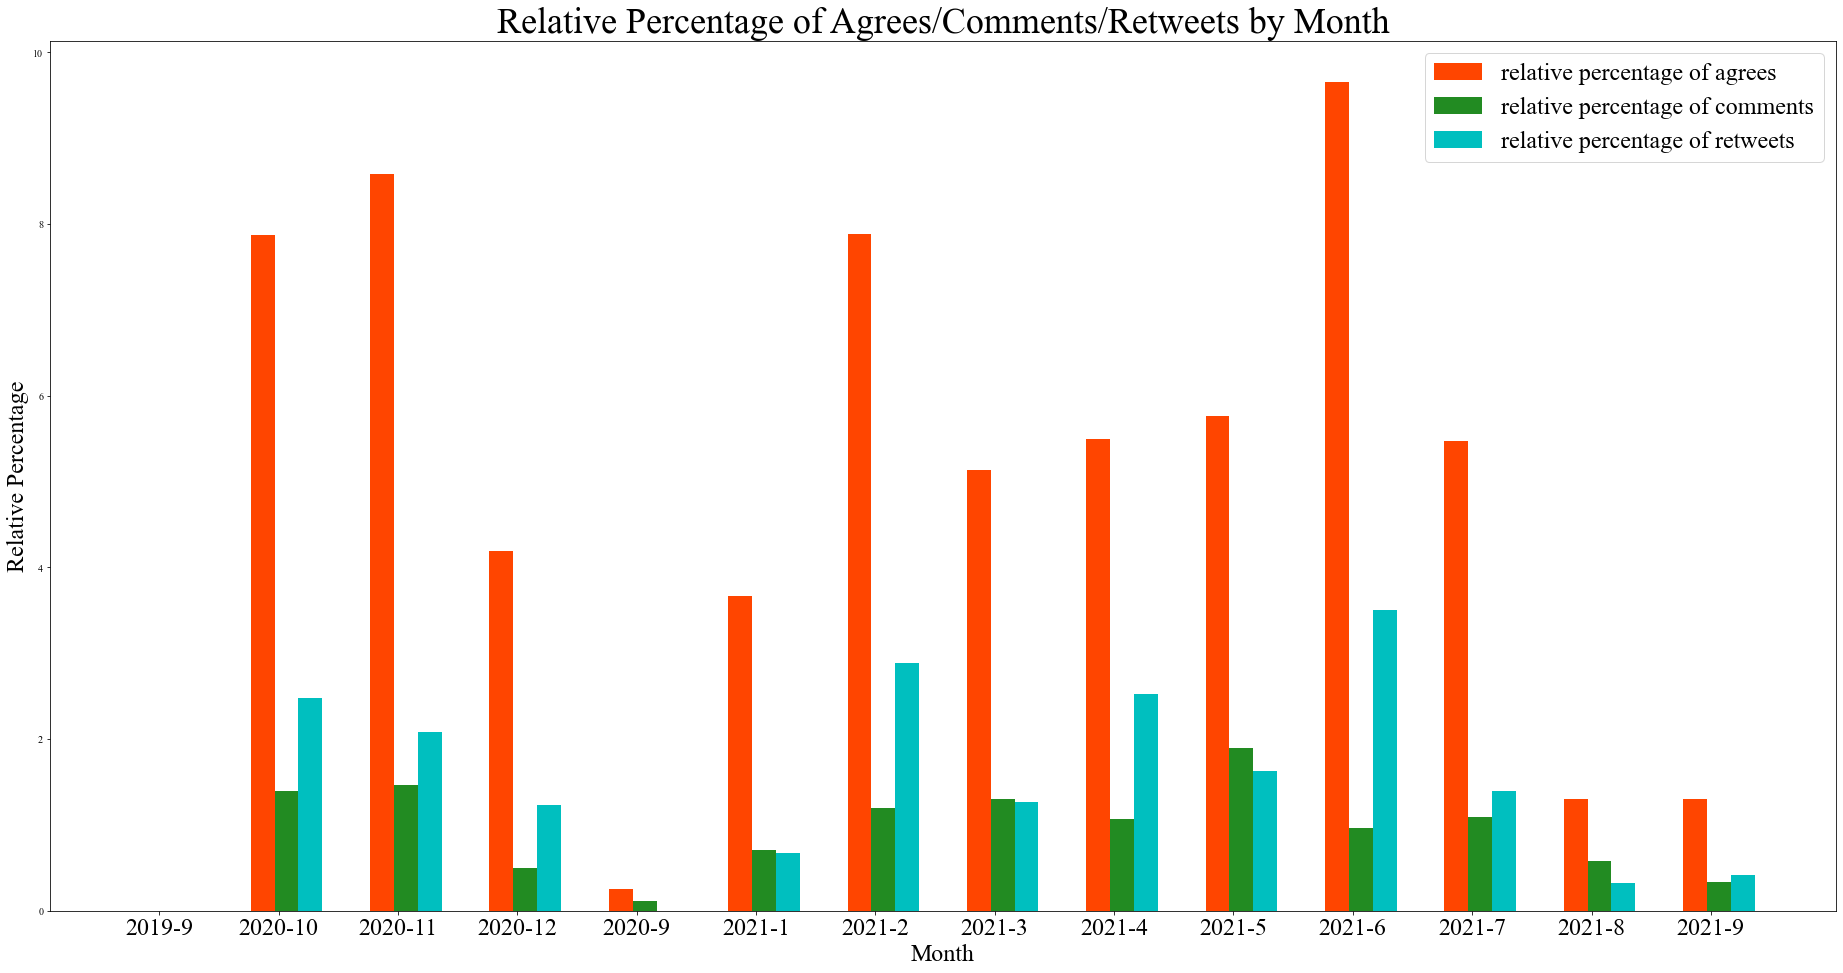

In [105]:
x1=np.arange(len(agrees)) #通常将x轴上的数字数字化处理
x2=[i+0.2 for i in x1] #设置间隔，第二个条形图在第一个条形图往右移动一格
x3=[i+0.2 for i in x2]
w=0.2


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(agrees["agree_rela"]),width=w,color="orangered",label="relative percentage of agrees")
ax.bar(x2,np.array(comments["comment_rela"]),width=w,color="forestgreen",label="relative percentage of comments")
ax.bar(x3,np.array(retweets["retweet_rela"]),width=w,color="c",label="relative percentage of retweets")

ax.set_title("Relative Percentage of Agrees/Comments/Retweets by Month", fontsize=36)
ax.get_yaxis().set_visible(True)
plt.xticks(x1+0.4/3,labels=agrees.index,fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)

plt.legend(loc='upper right',fontsize=24)
plt.show()

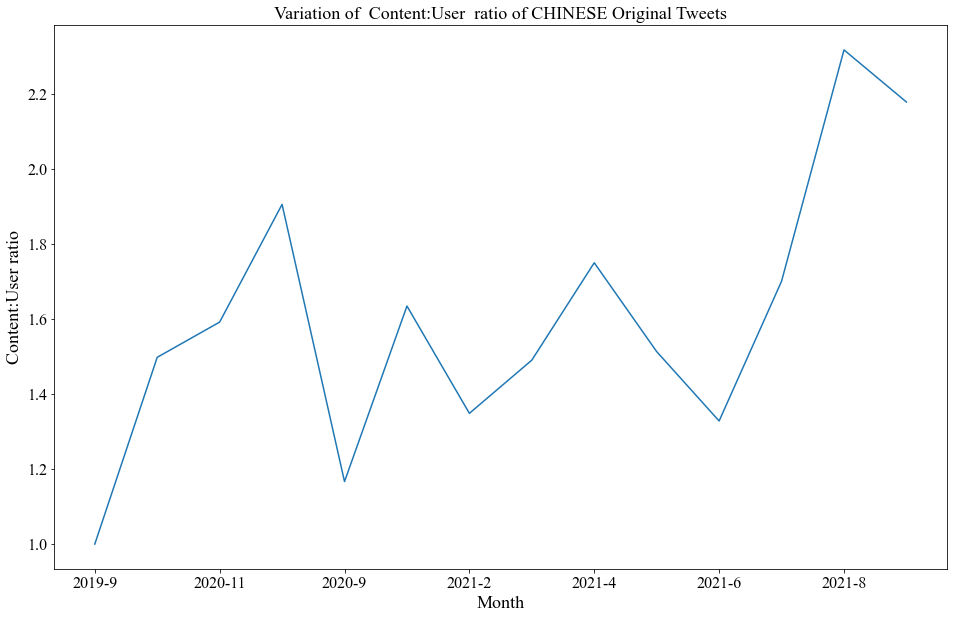

In [106]:
cnt=chi.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=chi.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month


bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User  ratio of CHINESE Original Tweets", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

In [107]:
data_original_chi=chi[["cnt_agree", "cnt_comment", "cnt_retweet","snownlp_senti"]]
original_chi=chi[["content","cnt_agree", "cnt_comment", "cnt_retweet","snownlp_senti"]]

In [108]:
import langid   
cmt=comment.copy()
cmt["language"]=cmt["content"].apply(lambda x: (langid.classify(x))[0] )
cmt["language"].count()

14191

In [109]:
cmt.groupby("language").count().sort_values("topic_guid",ascending=False)[:10]

userid  content  publish_time  page_action_type  \
language                                                    
zh          9466     9466          9466              9466   
en          3357     3357          3357              3357   
es           354      354           354               354   
mt           231      231           231               231   
vi           123      123           123               123   
mn           105      105           105               105   
ja            82       82            82                82   
pl            69       69            69                69   
nl            56       56            56                56   
fr            47       47            47                47   

          relevant_topic_guid  topic_guid  cnt_agree  cnt_comment  \
language                                                            
zh                       9466        9466       9466         9466   
en                       3357        3357       3357         3357   
es                        354         354        354          354   
mt                        231         231        231          231   
vi                        123         123        123          123   
mn                        105         105        105          105   
ja                         82          82         82           82   
pl                         69          69         69           69   
nl                         56          56         56           56   
fr                         47          47         47           47   

          cnt_retweet  dayofweek  
language                          
zh               9466       9466  
en               3357       3357  
es                354        354  
mt                231        231  
vi                123        123  
mn                105        105  
ja                 82         82  
pl                 69         69  
nl                 56         56  
fr                 47         47

In [110]:
comment_chi=cmt[cmt["language"]=="zh"]
comment_eng=cmt[cmt["language"]=="en"]
comment_chi.count(),comment_eng.count()

(userid                 9466
 content                9466
 publish_time           9466
 page_action_type       9466
 relevant_topic_guid    9466
 topic_guid             9466
 cnt_agree              9466
 cnt_comment            9466
 cnt_retweet            9466
 dayofweek              9466
 language               9466
 dtype: int64,
 userid                 3357
 content                3357
 publish_time           3357
 page_action_type       3357
 relevant_topic_guid    3357
 topic_guid             3357
 cnt_agree              3357
 cnt_comment            3357
 cnt_retweet            3357
 dayofweek              3357
 language               3357
 dtype: int64)

### Twitter英文评论

In [111]:
comment_eng

userid                                            content  \
168    PropineGlobal  The first test for China’s e-CNY with internat...   
169         bear_tax  3/ Beijing Subway Has Fully Integrated China's...   
176      pstAsiatech  Yup... The e-CNY will expand the renminbi’s us...   
201       schomber_m  @mstrade I don't think they will succeed with ...   
202    rafael_colley               @mstrade Ok, let's see what happens!   
...              ...                                                ...   
21990  TyrionLannAmp  @TheBullRun2021 I had to look it up:The digita...   
21993  richardturrin  @chainyoda @ofnumbers @DoveyWan @mattysino Hi ...   
21994   CurrencyWar1  yen and Sterling )  but there is the added com...   
21995      lyrichues  @nathanielpopper This time could be different....   
22011  ReviewsBroken  @APompliano Thesis: CCP want digital Yuan (e-C...   

      publish_time page_action_type               relevant_topic_guid  \
168     2021-08-11               08  38051f7dc6855365231fea60ba912da2   
169     2021-08-10               08  c9fb180cc5b85cda5d353300f36a155c   
176     2021-08-09               08  ea86982462aa8799924280d467e7ff72   
201     2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   
202     2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   
...            ...              ...                               ...   
21990   2021-06-24               08  1f246a98371559c97955db262f635b9c   
21993   2021-06-22               08  3e89122043a620637cd00b59ee8eba1d   
21994   2021-06-22               08  fe4557b6901ea110b505e5f5fe4778f7   
21995   2021-06-22               08  cc0833ad5937d465e454e934edeb80f0   
22011   2021-06-21               08  82900ea1e773cbab69c68904a980ed77   

                             topic_guid cnt_agree cnt_comment cnt_retweet  \
168    d4e36f3b48fb6186d93f956638320f32         0           0           0   
169    208ce1a92457d75f8969b2492c658592         1           1           0   
176    93e3df85d00e91274c2ee6f28531bf15         2           0           0   
201    1a94e45c988227e50ec0f2c68792fd25         0           0           0   
202    cc231dbed1519a593a03067b6d3d5f0c         0           0           0   
...                                 ...       ...         ...         ...   
21990  94cbc66a2aff68e8a37f08049e4cae08         8           1           0   
21993  90879e34c005589321d7bf394bf4a38e         0           0           0   
21994  ff6307ddc4ffb7e9fe8ca6f2a9727988         0           1           0   
21995  26619f11d4e0d44e141594c25037d76f         3           0           0   
22011  12849cb1c044f19af2aef8c4dbe7fae2         5           0           0   

       dayofweek language  
168    Wednesday       en  
169      Tuesday       en  
176       Monday       en  
201     Saturday       en  
202     Saturday       en  
...          ...      ...  
21990   Thursday       en  
21993    Tuesday       en  
21994    Tuesday       en  
21995    Tuesday       en  
22011     Monday       en  

[3357 rows x 11 columns]

In [112]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 
comment_eng["content"]=comment_eng["content"].apply(lambda x : tweet_tokenizer.tokenize(x))
comment_eng["content"]

<ipython-input-112-d7e41f025e63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_eng["content"]=comment_eng["content"].apply(lambda x : tweet_tokenizer.tokenize(x))


168      [The, first, test, for, China, ’, s, e-CNY, wi...
169      [3, /, Beijing, Subway, Has, Fully, Integrated...
176      [Yup, ..., The, e-CNY, will, expand, the, renm...
201      [@mstrade, I, don't, think, they, will, succee...
202        [@mstrade, Ok, ,, let's, see, what, happens, !]
                               ...                        
21990    [@TheBullRun2021, I, had, to, look, it, up, :,...
21993    [@chainyoda, @ofnumbers, @DoveyWan, @mattysino...
21994    [yen, and, Sterling, ), but, there, is, the, a...
21995    [@nathanielpopper, This, time, could, be, diff...
22011    [@APompliano, Thesis, :, CCP, want, digital, Y...
Name: content, Length: 3357, dtype: object

In [113]:
import re
import string
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(r'\W+', ' ', text)

    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\'','', text)
    #text = re.sub(r'\W+', ' ', text)
    #text = re.sub(r'\b\w{1,2}\b', " ", text)# removes remaining one-letter words and two letters words 
    return text 
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_url(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_punct(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_html(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_emoji(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : decontraction(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : seperate_alphanumeric(str(x)))
comment_eng["content"]=comment_eng["content"].apply(lambda x : clean_text(str(x)))

#comment_eng["content"]=comment_eng["content"].apply(lambda x: re.sub(r'\b\w{1,2}\b', "", x))
#comment_eng["content"]=comment_eng["content"].apply(lambda x: re.sub(r"[ \t]{2,}", "", x))
cmt_eng=comment_eng.copy()# no stopwords removal,lemmilization for sentimental analysis

cmt_eng["content"]

<ipython-input-113-e9705a049dda>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_url(str(x)))
<ipython-input-113-e9705a049dda>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_eng["content"]=comment_eng["content"].apply(lambda x : remove_punct(str(x)))
<ipython-input-113-e9705a049dda>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

168      the first test for china s ecny with internati...
169        beijing subway has fully integrated chinas c...
176      yup the ecny will expand the renminbi s use in...
201      mstrade i dont think they will succeed with th...
202                       mstrade ok lets see what happens
                               ...                        
21990    thebullrun   i had to look it up the digital y...
21993    chainyoda ofnumbers doveywan mattysino hi ajit...
21994    yen and sterling but there is the added compli...
21995    nathanielpopper this time could be different m...
22011    apompliano thesis ccp want digital yuan ecny t...
Name: content, Length: 3357, dtype: object

In [114]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #pip install vaderSentiment
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df
cmt_eng = compute_vader_scores(cmt_eng , "content")
cmt_eng['comp_score'] = cmt_eng ['vader_comp'].apply(lambda c: 'pos' if c >0 else('neu' if c==0 else 'neg'))
cmt_eng.head()

userid                                            content  \
168  PropineGlobal  the first test for china s ecny with internati...   
169       bear_tax    beijing subway has fully integrated chinas c...   
176    pstAsiatech  yup the ecny will expand the renminbi s use in...   
201     schomber_m  mstrade i dont think they will succeed with th...   
202  rafael_colley                   mstrade ok lets see what happens   

    publish_time page_action_type               relevant_topic_guid  \
168   2021-08-11               08  38051f7dc6855365231fea60ba912da2   
169   2021-08-10               08  c9fb180cc5b85cda5d353300f36a155c   
176   2021-08-09               08  ea86982462aa8799924280d467e7ff72   
201   2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   
202   2021-08-07               08  b05997633aa608c9b7f06689dafdaf17   

                           topic_guid cnt_agree cnt_comment cnt_retweet  \
168  d4e36f3b48fb6186d93f956638320f32         0           0           0   
169  208ce1a92457d75f8969b2492c658592         1           1           0   
176  93e3df85d00e91274c2ee6f28531bf15         2           0           0   
201  1a94e45c988227e50ec0f2c68792fd25         0           0           0   
202  cc231dbed1519a593a03067b6d3d5f0c         0           0           0   

     dayofweek language  vader_neg  vader_neu  vader_pos  vader_comp  \
168  Wednesday       en        0.0      1.000      0.000      0.0000   
169    Tuesday       en        0.0      1.000      0.000      0.0000   
176     Monday       en        0.0      0.903      0.097      0.4767   
201   Saturday       en        0.0      0.738      0.262      0.4939   
202   Saturday       en        0.0      0.694      0.306      0.2960   

    comp_score  
168        neu  
169        neu  
176        pos  
201        pos  
202        pos

#### 结合情感分类 统计评论帖文的情感分布

In [115]:
percent_pos = round(100*cmt_eng[cmt_eng['comp_score']=="pos"].shape[0]/cmt_eng['comp_score'].shape[0], 2)
percent_neu = round(100*cmt_eng[cmt_eng['comp_score']=="neu"].shape[0]/cmt_eng['comp_score'].shape[0], 2)
percent_neg = round(100*cmt_eng[cmt_eng['comp_score']=="neg"].shape[0]/cmt_eng['comp_score'].shape[0], 2)

print(str(percent_pos) + "% of english comments have positive sentiment given by VADER")
print(str(percent_neg) + "% of english comments have negative sentiment given by VADER")

49.6% of english comments have positive sentiment given by VADER
12.57% of english comments have negative sentiment given by VADER


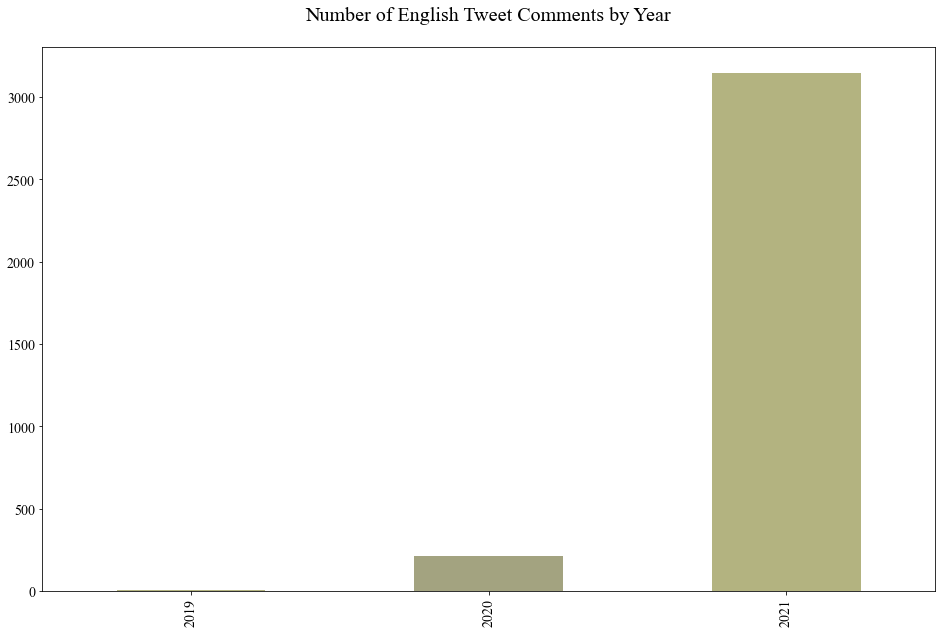

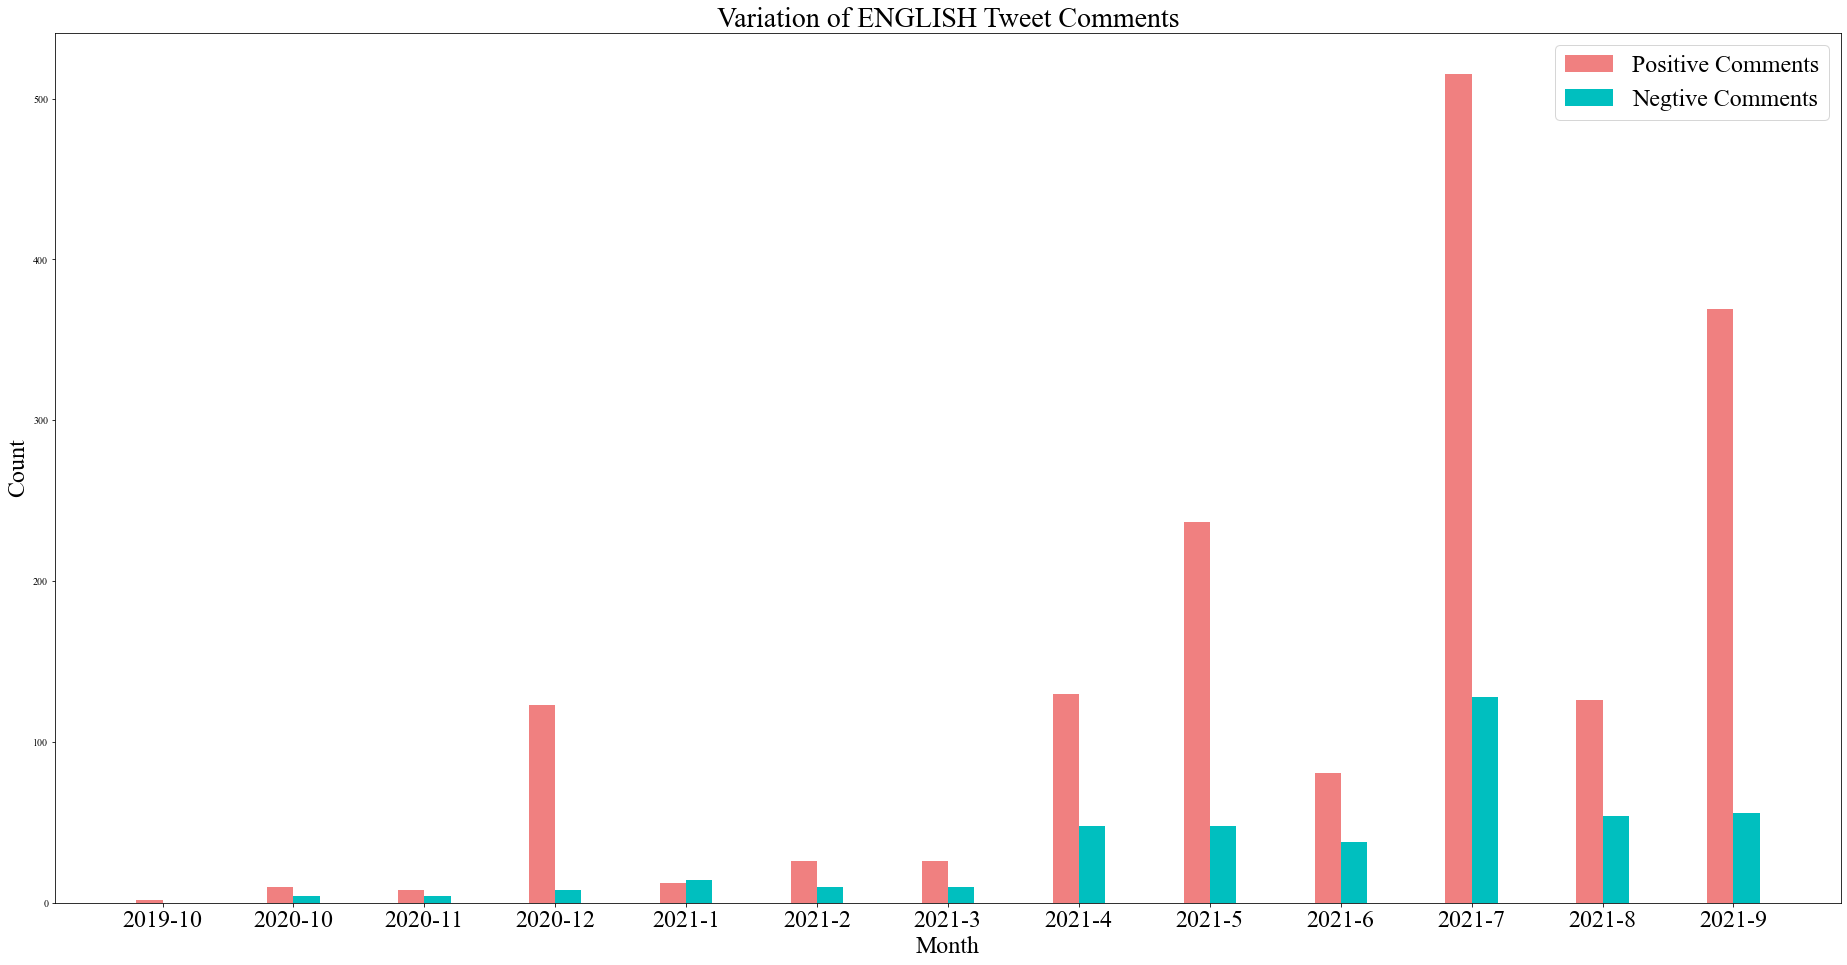

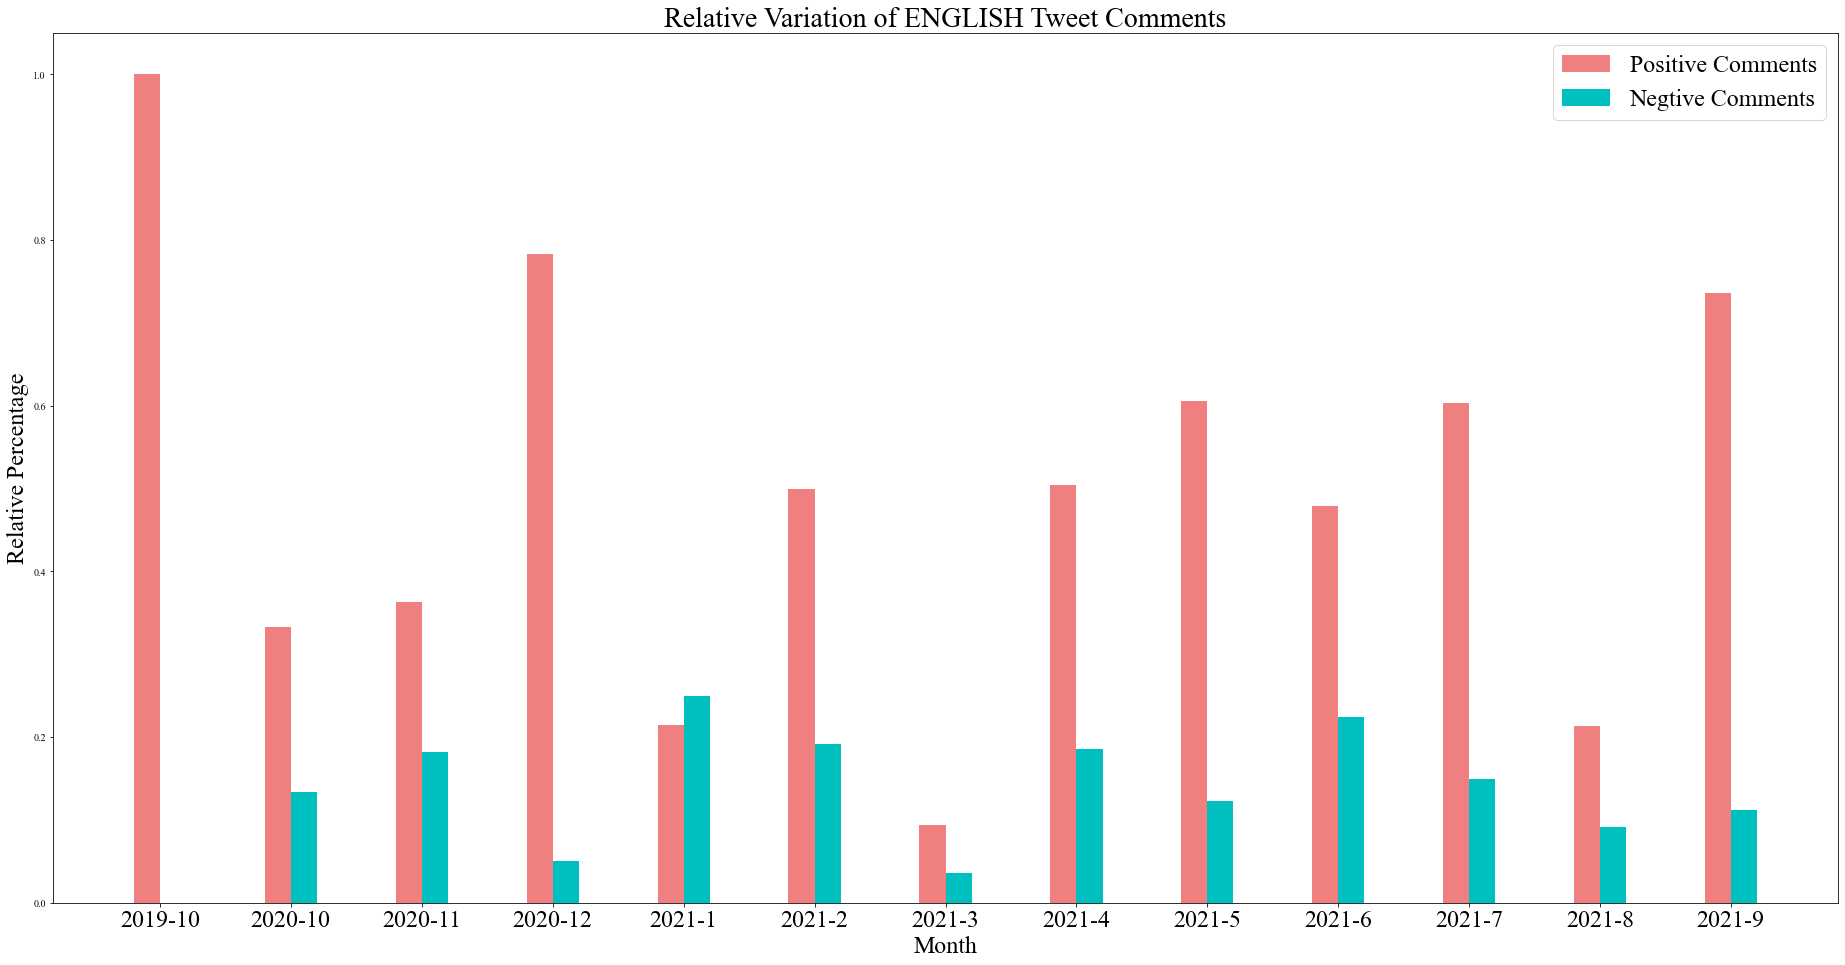

In [116]:
# Number of tweets by year
colors = []
for i in range(2020-2019+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = cmt_eng["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of English Tweet Comments by Year\n", fontsize=20)
bar.tick_params(labelsize=14)
plt.show()

# Number of tweets (more details)
cmt_eng["year_month"] = cmt_eng["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))


year_month_pos = cmt_eng["year_month"][cmt_eng['comp_score']=="pos"].value_counts(dropna=False).sort_index()
year_month_neg = cmt_eng["year_month"][cmt_eng['comp_score']=="neg"].value_counts(dropna=False).sort_index()
year_month_neg["2019-10"]=0
year_month_neg=year_month_neg.sort_index()

#print(year_month_pos)
#print(year_month_neg)
x1=np.arange(len(year_month_pos)) 
x2=[i+0.2 for i in x1]


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values),width=0.2,color="c",label="Negtive Comments")

plt.title("Variation of ENGLISH Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

# Relative number of tweets 
fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="c",label="Negtive Comments")

plt.title("Relative Variation of ENGLISH Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

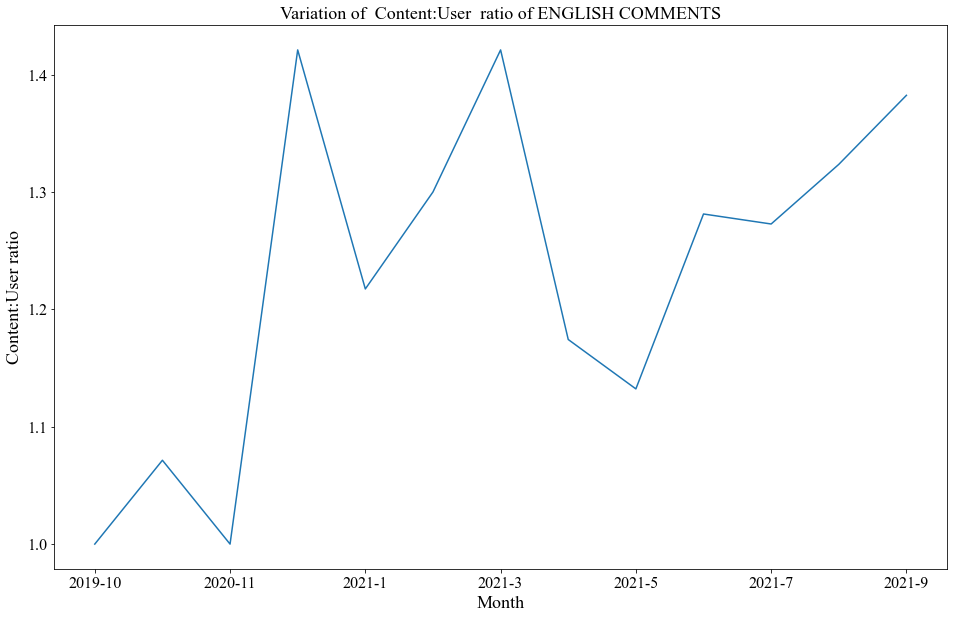

In [117]:
cnt=cmt_eng.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=cmt_eng.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month
cnt_to_usr

bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User  ratio of ENGLISH COMMENTS", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

#### 展示评论帖文的情感打分变化

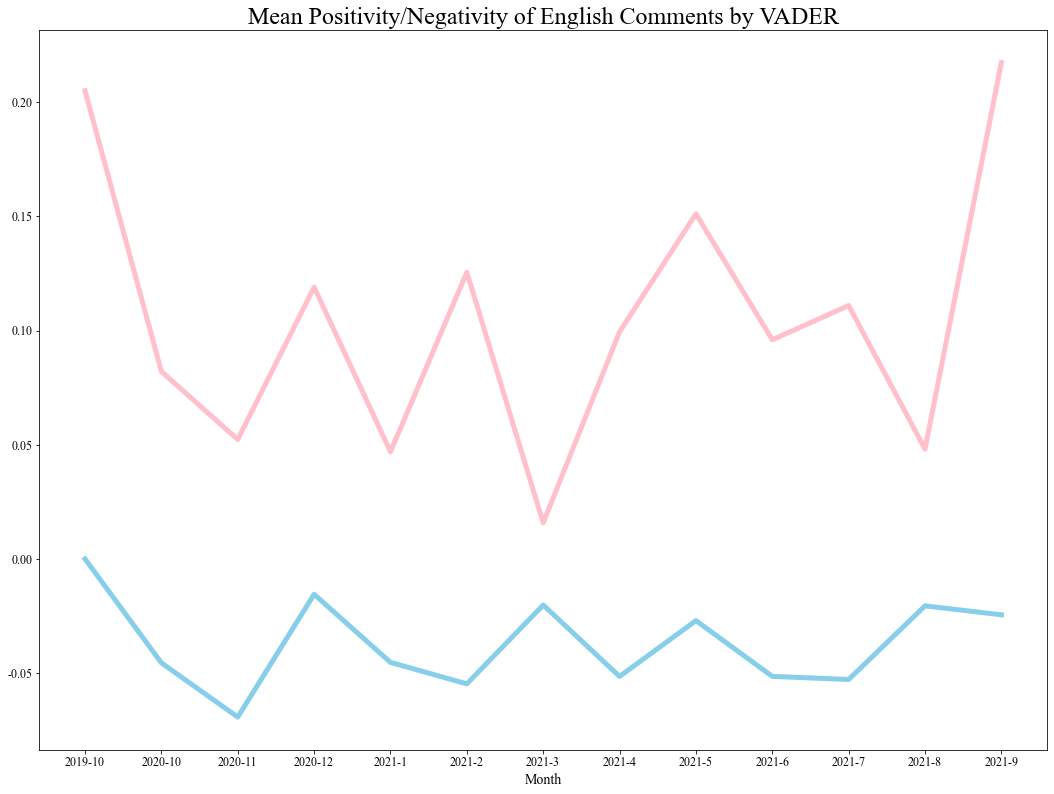

In [118]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of English Comments by VADER", fontsize=24)
ax.tick_params(labelsize=14)


# Positivity plot
year_month = pd.pivot_table(cmt_eng, values = "vader_pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

# Negativity plot
year_month = pd.pivot_table(cmt_eng, values = "vader_neg", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")
plt.xlabel("Month",fontsize=14)

ax.tick_params(labelsize=12)
plt.show()

In [119]:
data_comment_eng=cmt_eng[["cnt_agree", "cnt_comment", "cnt_retweet","comp_score"]]

### Twitter中文评论

In [120]:
comment_chi

userid                                            content  \
16     feixiangdayang    @offweightstudio 有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了   
17     frozen00788293                  @wangzhian8848 封杀比特币是不是给数字人民币腾地方？   
18       lv_tianxiang  @dougjing @dw_chinese 不算，数字人民币本质上也是人民币，和现金是兑换的...   
19          sylichao1  @HenryLa13947038 数字人民币是现实中的人民币的数字化，和比特币这种基于虚拟计...   
20       lv_tianxiang  @ThECRackERBaRoN 昨天刚听了微博上卡相他们的一个关于虚拟货币的连线直播，还是...   
...               ...                                                ...   
22145         G2_1988  @ForrestDay11 的确，数字美元都还没到授精阶段呢。国内金融机构对数字人民币依然很...   
22146     GeorgeYin20  @ChineseWSJ 怎么同样的推文会出来好多次？加密货币跟数字人民币根本就是两码事，华尔...   
22147      US93492643  @G2_1988 说说我的观点：数字货币就相当于现金，现金就是一手交钱一手交货，手里有紧俏货...   
22148    suld85841853         @biquannews @__Inty__ 中国自己不是研究数字人民币吗？那不扯淡嘛   
22149      ZerohedgeC  @zerohedge 与此同时，中国的数字人民币正在变成一个巨大的失败https://t.c...   

      publish_time page_action_type               relevant_topic_guid  \
16      2021-05-20               08  b84923f02c2f33fb951bb8458ad46d29   
17      2021-05-20               08  5326f9031aa71782ec498dd1971b8f0e   
18      2021-05-20               08  1e1d1d5205fa17fd1643b7dfe4351f17   
19      2021-05-20               08  d2dda41565e902537ede76f905eda131   
20      2021-05-20               08  e28c0a4e7df15a9df0d570b8fae54cf2   
...            ...              ...                               ...   
22145   2021-05-23               08  5c03cd76731321364ebcc63723a813fa   
22146   2021-05-23               08  61bf8ca52cf7313b499eca835d56d2b3   
22147   2021-05-23               08  5e0aff9a21c3aa019c9c3977e73586c8   
22148   2021-05-22               08  948bddb78e181d435199c7c03de251d3   
22149   2021-05-22               08  b317f8489e8e6c34d27c22e23f22a5f5   

                             topic_guid cnt_agree cnt_comment cnt_retweet  \
16     b9b32262cdeb1f1b839350c6c797704c         0           0           0   
17     1a7cb65e11b097e0e291ed3443e8f4f8         0           1           0   
18     9098bfbbf645d134f831c967d92ef479        19           0           0   
19     f0c02b07ca4ad9ed86a1c14ae2110603         0           0           0   
20     aea6847ecc10bc2ad467e48f6cd65e64         1           1           0   
...                                 ...       ...         ...         ...   
22145  0c3a89f11152fe85089f4013f223f539         0           2           0   
22146  f324349169602004101c7381d79e0ff7         1           0           0   
22147  49f598c7c431bbba524bb01a9de09798         2           1           0   
22148  00d3bf42e7ecd596775944adc50c6c66         0           0           0   
22149  4f5bc1d3f2488ba69a438c6c652afaa6         0           0           0   

      dayofweek language  
16     Thursday       zh  
17     Thursday       zh  
18     Thursday       zh  
19     Thursday       zh  
20     Thursday       zh  
...         ...      ...  
22145    Sunday       zh  
22146    Sunday       zh  
22147    Sunday       zh  
22148  Saturday       zh  
22149  Saturday       zh  

[9466 rows x 11 columns]

In [121]:
import re
import string
import emoji

def clean_text(text):
    '''Make text lowercase, 
    remove text in square brackets,
    remove links,
    remove punctuation.'''
    text = str(text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\【.*?\】', '', text)
    text = re.sub('\《.*?\》', '', text)
    text = re.sub(r"#",'', text)
    text = re.sub(r"•",'', text)
    text = re.sub(r"（",'', text)
    text = re.sub(r"）",'', text)
    text = re.sub(r"『",'', text)
    text = re.sub(r"』",'', text)
    text = re.sub(r"“",'', text)
    text = re.sub(r"”",'', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    #text = re.sub(r'\W+', '', text)
    #text = re.sub('[^%&,;=?$\x22]', '', text)
    text = re.sub("[a-zA-Z0-9]", "", text)
    text = re.sub(r'\b\w{1,2}\b', "", text) # removes remaining one-letter words and two letters words 
    text = re.sub(r"[ \t]{2,}", "", text)
    return text 


emoji_pattern = re.compile("["
    u'[\uD800-\uDBFF][\uDC00-\uDFFF]'
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

def demojized(text):
    text = emoji.demojize(text)
    return text

comment_chi["content"] = comment_chi["content"].apply(lambda x : demojized(x))
comment_chi["content"] = comment_chi["content"].apply(lambda x : remove_emoji(x))
comment_chi["content"] = comment_chi["content"].apply(lambda x : clean_text(x))
comment_chi["content"]

<ipython-input-121-f8198bafd78b>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_chi["content"] = comment_chi["content"].apply(lambda x : demojized(x))
<ipython-input-121-f8198bafd78b>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_chi["content"] = comment_chi["content"].apply(lambda x : remove_emoji(x))
<ipython-input-121-f8198bafd78b>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


16                          有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了
17                                      封杀比特币是不是给数字人民币腾地方？
18       ，数字人民币本质上也是人民币，和现金是兑换的关系，，只不过载体分别是金属代码而已。人民币的价...
19               数字人民币是现实中的人民币的数字化，和比特币这种基于虚拟计算生产的东西有本质区别的
20        昨天刚听了微博上卡相他们的一个关于虚拟货币的连线直播，还是挺有收获的。数字人民币和比特币完...
                               ...                        
22145     ，数字美元都还没到授精阶段呢。国内金融机构对数字人民币依然很低调，但其对美元的威胁美国是能...
22146     怎么同样的推文会出来好多次？加密货币跟数字人民币根本就是两码事，华尔街日报招的华语员工都是...
22147     说说我的观点：数字货币就相当于现金，现金就是一手交钱一手交货，手里有紧俏货的想要哪国的现金...
22148                                 中国自己不是研究数字人民币吗？那不扯淡嘛
22149                             与此同时，中国的数字人民币正在变成一个巨大的失败
Name: content, Length: 9466, dtype: object

In [122]:
comment_chi['len'] = comment_chi['content'].apply(lambda x:len(x))
comment_chi=comment_chi[comment_chi['len']>1]
text=comment_chi.copy()

<ipython-input-122-77af700e3888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_chi['len'] = comment_chi['content'].apply(lambda x:len(x))


In [123]:
from snownlp import SnowNLP
def compute_snownlp_scores(df, label):
    df["snownlp_scores"] = df[label].apply(lambda x: SnowNLP(x).sentiments)
    return df
sentiment = compute_snownlp_scores(text, "content")

In [124]:
def compute_snownlp_senti(df,refer):
    df["snownlp_senti"] = df[refer].apply(lambda x: "pos" if x>0.8 else ('neg' if x<0.5 else 'neu'))
    return df
sentiment = compute_snownlp_senti(sentiment, "snownlp_scores")
cmt_chi=sentiment.copy()
sentiment[:1]

userid                          content publish_time  \
16  feixiangdayang   有人把火币，比特币，数字人民币都分不清楚、就已经来教育别人了   2021-05-20   

   page_action_type               relevant_topic_guid  \
16               08  b84923f02c2f33fb951bb8458ad46d29   

                          topic_guid cnt_agree cnt_comment cnt_retweet  \
16  b9b32262cdeb1f1b839350c6c797704c         0           0           0   

   dayofweek language  len  snownlp_scores snownlp_senti  
16  Thursday       zh   31         0.84005           pos

In [125]:
percent_pos = round(100*sentiment[sentiment['snownlp_senti']=="pos"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neu = round(100*sentiment[sentiment['snownlp_senti']=="neu"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)
percent_neg = round(100*sentiment[sentiment['snownlp_senti']=="neg"].shape[0]/sentiment['snownlp_senti'].shape[0], 2)

print(str(percent_pos) + "% 的中文评论被SnowNLP分类为正面情感")
print(str(percent_neg) + "% 的中文评论被SnowNLP分类为负面情感")

38.57% 的中文评论被SnowNLP分类为正面情感
36.77% 的中文评论被SnowNLP分类为负面情感


#### 结合情感分类 统计评论帖文的情感分布

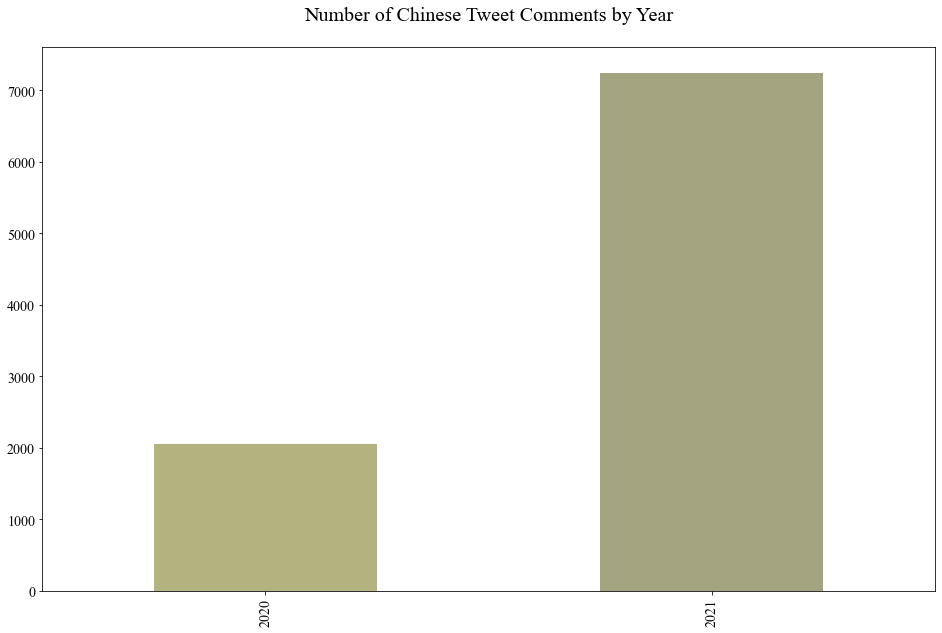

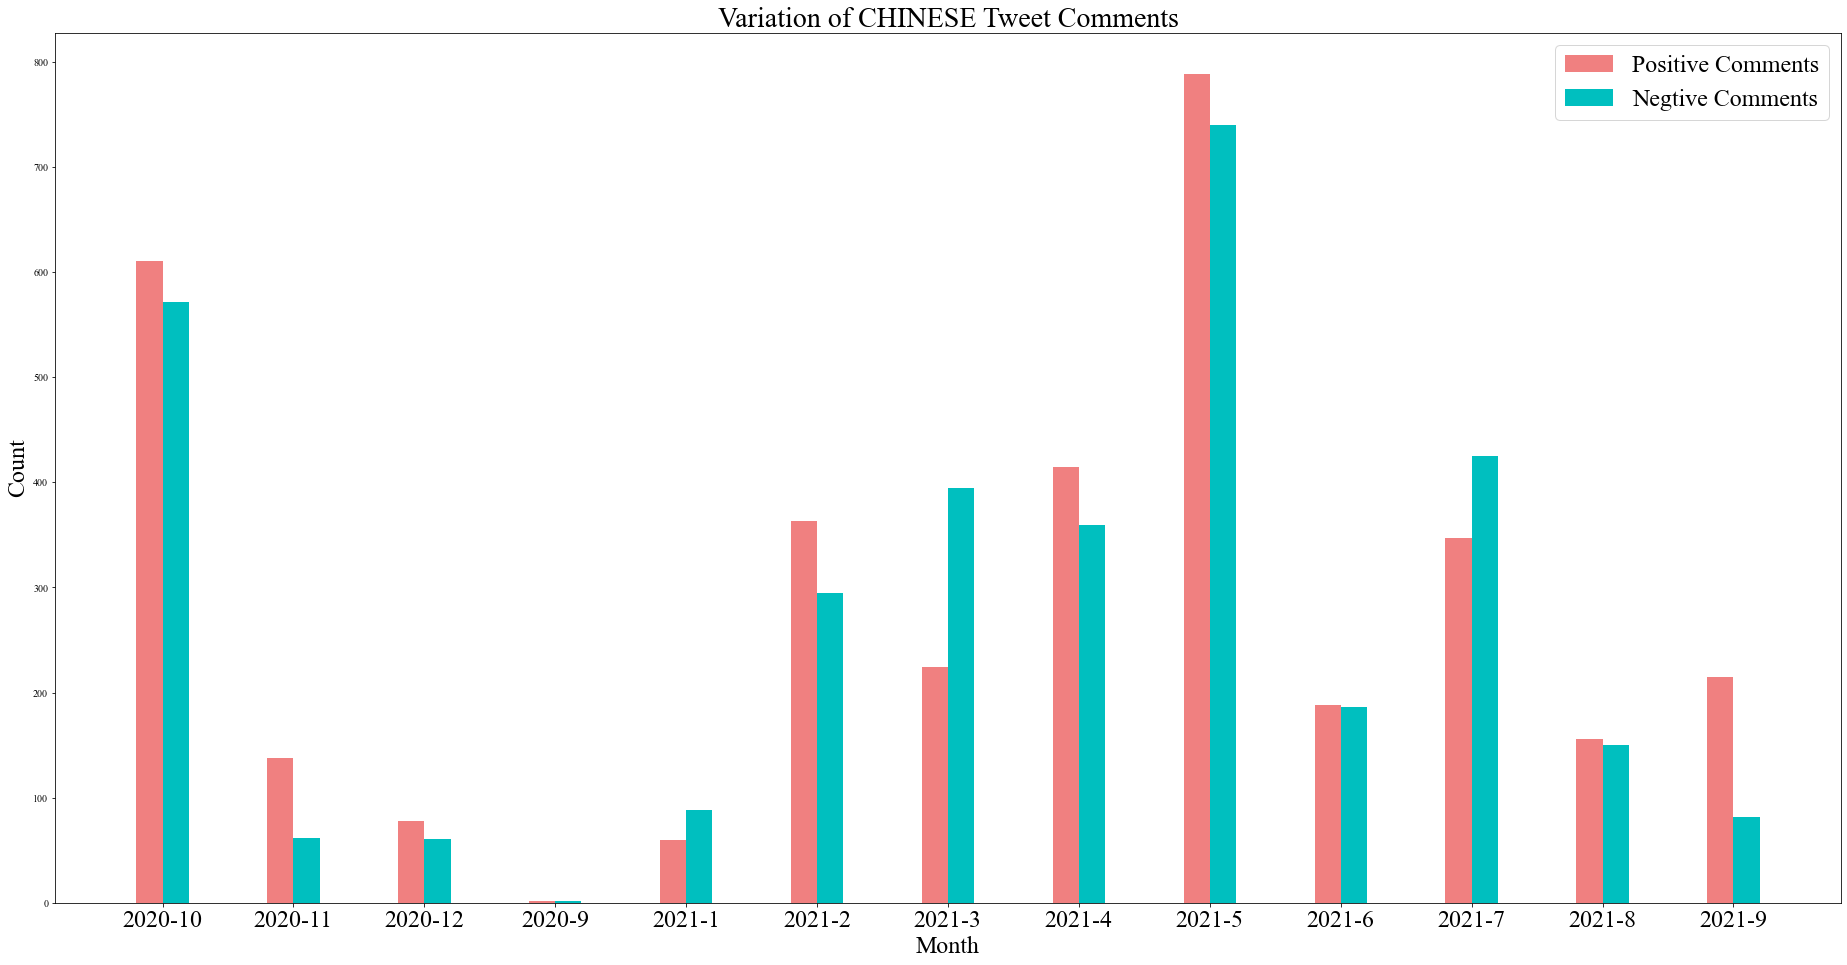

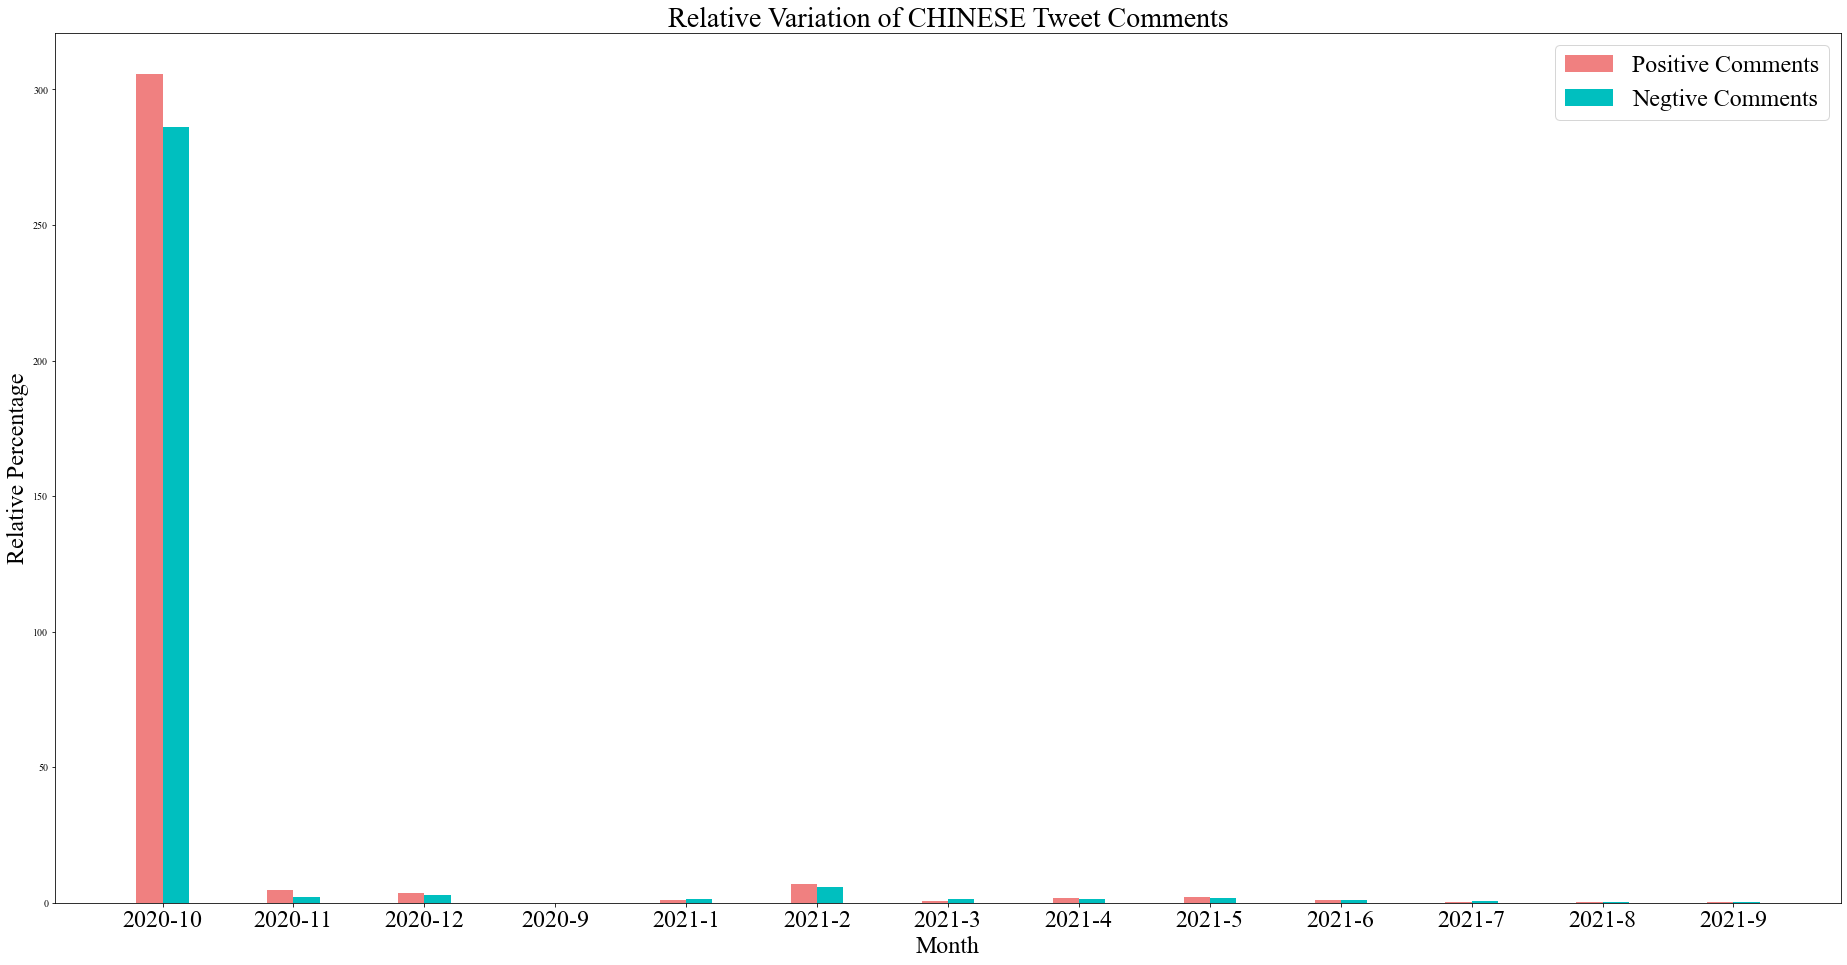

In [126]:
# Number of tweets by year
colors = []
for i in range(2020-2010+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = cmt_chi["publish_time"].apply(lambda x: x.year).value_counts(dropna=True).sort_index().plot.bar(figsize = (16,10), color = colors)
plt.title("Number of Chinese Tweet Comments by Year\n", fontsize=20)
bar.tick_params(labelsize=14)
plt.show()

# Number of tweets (more details)
cmt_chi["year_month"] = cmt_chi["publish_time"].apply(lambda x: str(x.year)+"-"+str(x.month))


year_month_pos = cmt_chi["year_month"][cmt_chi['snownlp_senti']=="pos"].value_counts(dropna=False).sort_index()
year_month_neg = cmt_chi["year_month"][cmt_chi['snownlp_senti']=="neg"].value_counts(dropna=False).sort_index()

#print(year_month_pos)
#print(year_month_neg)
x1=np.arange(len(year_month_pos)) 
x2=[i+0.2 for i in x1]


fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values),width=0.2,color="c",label="Negtive Comments")

plt.title("Variation of CHINESE Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Count",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

# Relative number of tweets 
fig,ax=plt.subplots(figsize=(32,16))
ax.bar(x1,np.array(year_month_pos.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="lightcoral",label="Positive Comments")
ax.bar(x2,np.array(year_month_neg.values)/np.array(cmt_eng["year_month"].value_counts(dropna=True).sort_index()),width=0.2,color="c",label="Negtive Comments")

plt.title("Relative Variation of CHINESE Tweet Comments", fontsize=28)
plt.xticks(x1+0.2/2,labels=year_month_pos.index,fontsize=24)
bar.tick_params(labelsize=16)
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Month",fontsize=24)
plt.ylabel("Relative Percentage",fontsize=24)

bar.get_yaxis().set_visible(True)
plt.show()

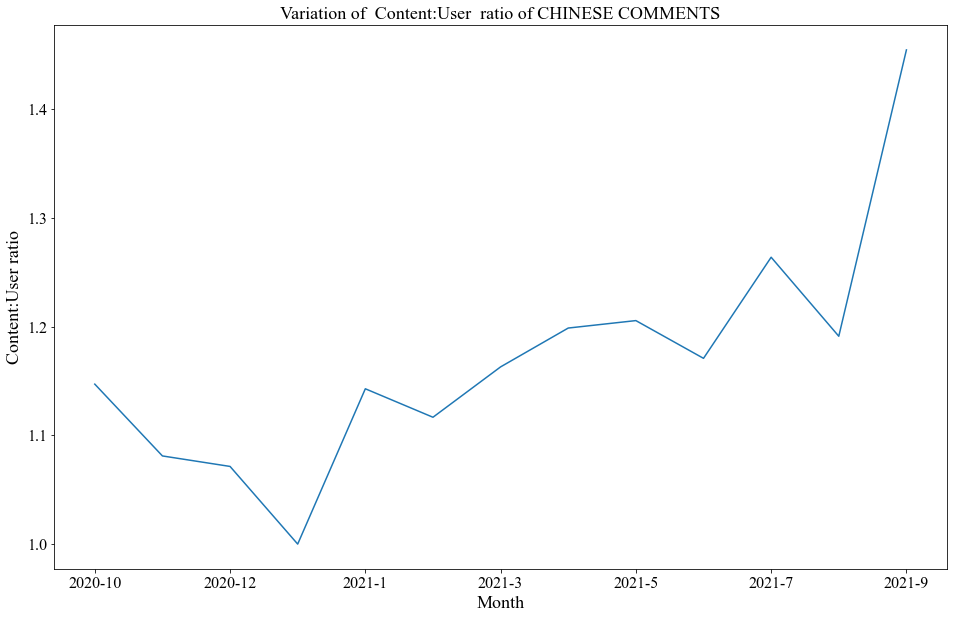

In [127]:
cnt=cmt_chi.groupby(["year_month","topic_guid"])["topic_guid"].count()
usr=cmt_chi.groupby(["year_month","userid"])["userid"].count()
cnt_month=cnt.groupby(["year_month"]).count()
usr_month=usr.groupby(["year_month"]).count()
cnt_to_usr=cnt_month/usr_month
cnt_to_usr

bar = cnt_to_usr.plot(figsize = (16,10))
plt.title("Variation of  Content:User  ratio of CHINESE COMMENTS", fontsize=18)
bar.tick_params(labelsize=16)

plt.xlabel("Month", fontsize=18)
plt.ylabel("Content:User ratio", fontsize=18)
bar.get_yaxis().set_visible(True)
plt.show()

#### 展示评论帖文的情感打分变化

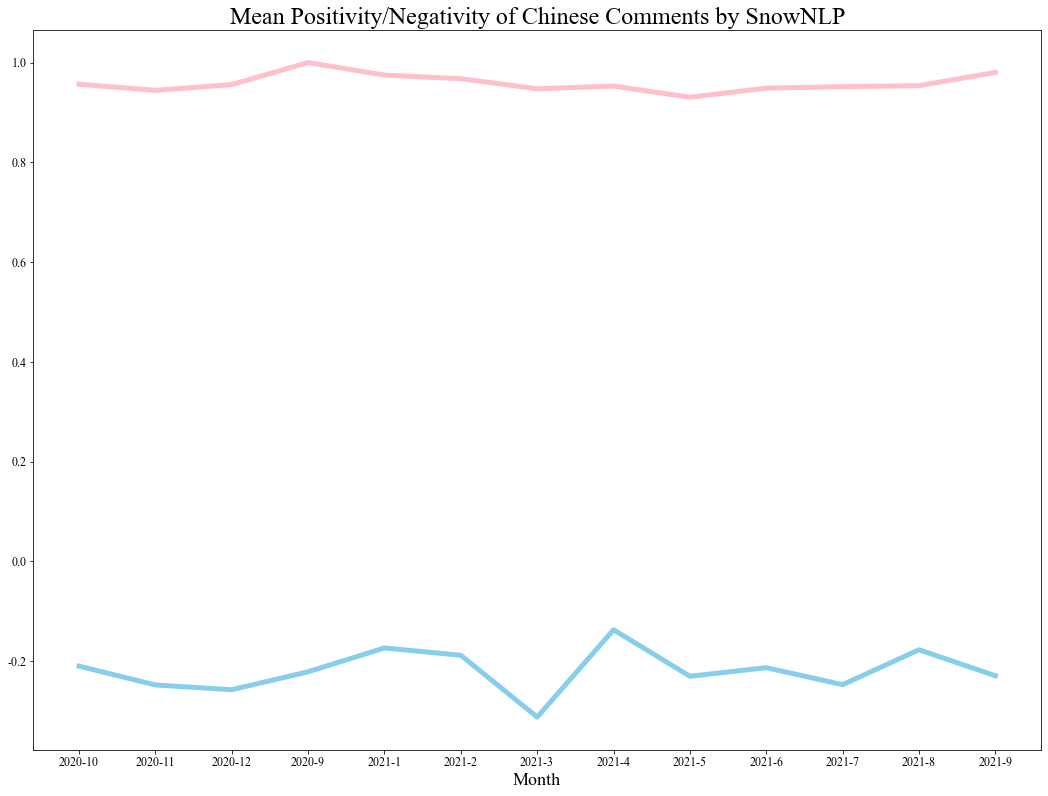

In [128]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean Positivity/Negativity of Chinese Comments by SnowNLP", fontsize=24)
ax.tick_params(labelsize=14)

pos_chi=cmt_chi[cmt_chi["snownlp_senti"]=="pos"]
neg_chi=cmt_chi[cmt_chi["snownlp_senti"]=="neg"]
# Positivity plot
year_month = pd.pivot_table(pos_chi, values = "snownlp_scores", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5,color = "Pink")

# Negativity plot
year_month = pd.pivot_table(neg_chi, values = "snownlp_scores", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "Skyblue")
plt.xlabel("Month",fontsize=18)



ax.tick_params(labelsize=12)
plt.show()

In [129]:
data_comment_chi=cmt_chi[["cnt_agree", "cnt_comment", "cnt_retweet","snownlp_senti"]]

基于单独帖文内容进行统计关联

In [132]:
original=twitter[twitter["page_action_type"]=="07"]
comment=twitter[twitter["page_action_type"]=="08"]
join=pd.merge(original,comment, on="relevant_topic_guid",how="inner")
join["year_month"] = join["publish_time_x"].apply(lambda x: str(x.year)+"-"+str(x.month))
# content_x 原帖内容 content_y 评论内容

In [133]:
t1=original["content"].value_counts().sort_values(ascending=False)
#t1=t1[t1>4]
t1.describe()

count    4006.000000
mean        2.014728
std         0.170284
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: content, dtype: float64

In [134]:
t2=comment["content"].value_counts().sort_values(ascending=False)
t2.describe()

count    4623.000000
mean        3.069652
std        12.669735
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max       317.000000
Name: content, dtype: float64

In [135]:
t2=t2[t2>30]
t2

https://t.co/kER0syielq                                                                                                                                                                                                                                                               317
今天怎么跌成这样                                                                                                                                                                                                                                                                              265
@iSpiritRain @Coooooper2 @6259yuan 不但支持无网络支付，还支持可编程的智能电子合约，这个想象空间就大了                                                                                                                                                                                                                  242
The spread of the system is getting some momentum, I’ve seen this notice on my hairdresser cashier desk.                                                  

In [136]:
#temp=join.groupby(["year_month","userid_x","userid_y"])
#pd.pivot_table(join,values=["userid_x","userid_y"],index="year_month", aggfunc = "count")
sort=join.groupby(["userid_x","userid_y"])["publish_time_x"].value_counts().sort_values(ascending=False)
sort=sort[sort>200]
sort

userid_x         userid_y         publish_time_x
QiangXu15        QiangXu15        2021-08-20        634
kaizhuna         kaizhuna         2021-05-18        530
ShenzhenCity     ShenzhenCity     2021-02-23        450
caijingxiang     lanhuacc         2021-05-22        438
rijingzhongwen   alixs24550520    2021-08-18        426
antont71         Camp12Nathan     2021-08-27        418
Jakewang4281     Mrlee83907332    2021-03-26        416
ChineseWSJ       bin_wag          2021-05-20        274
andreu_bernabeu  andreu_bernabeu  2021-05-07        230
OkTelegraph      OkTelegraph      2021-09-09        230
jamieCrypto      cryptoken_board  2021-05-05        220
BCoeure          VeriDelisi       2020-12-13        218
_Civil_Rights    zhangchn         2020-10-09        218
iDeFi100         wengshuai918     2021-06-10        212
WuBlockchain     _startcrypto     2021-07-20        210
ark999           LinLAM88         2020-10-15        210
AmarjargalR      Otgonbayar_bd    2021-08-01        210

In [137]:
sort_cmt=join.groupby(["year_month","userid_x","userid_y"])["content_y"].value_counts().sort_values(ascending=False)
sort_cmt[:5]

year_month  userid_x        userid_y       content_y                                                                                               
2021-8      QiangXu15       QiangXu15      https://t.co/kER0syielq                                                                                     634
2021-5      kaizhuna        kaizhuna       今天怎么跌成这样                                                                                                    530
2021-2      ShenzhenCity    ShenzhenCity   The spread of the system is getting some momentum, I’ve seen this notice on my hairdresser cashier desk.    450
2021-5      caijingxiang    lanhuacc       @caijingxiang 不要相信中共                                                                                        438
2021-8      rijingzhongwen  alixs24550520  @rijingzhongwen https://t.co/qgfhvv5Fo7                                                                     426
Name: content_y, dtype: int64

In [138]:
content=pd.merge(sort,join[['userid_x', 'content_x', 'publish_time_x','relevant_topic_guid','cnt_agree_x',
                                         'cnt_comment_x','cnt_retweet_x', 'userid_y', 'content_y','publish_time_y',
                                         'cnt_agree_y','cnt_comment_y', 'cnt_retweet_y',"year_month"]], 
                                        on=["userid_x","userid_y"],suffixes=("_totalcount","_top"),how="left")

content

userid_x   userid_y  publish_time_x_totalcount  \
0      QiangXu15  QiangXu15                        634   
1      QiangXu15  QiangXu15                        634   
2      QiangXu15  QiangXu15                        634   
3      QiangXu15  QiangXu15                        634   
4      QiangXu15  QiangXu15                        634   
...          ...        ...                        ...   
8321  wongkim728  tony52611                        204   
8322  wongkim728  tony52611                        204   
8323  wongkim728  tony52611                        204   
8324  wongkim728  tony52611                        204   
8325  wongkim728  tony52611                        204   

                                              content_x publish_time_x_top  \
0     电子健康码+数字人民币，以后共匪想控制谁给你个红码你哪儿都去不了，搞死你分分钟，你的所有财产...         2021-08-20   
1     电子健康码+数字人民币，以后共匪想控制谁给你个红码你哪儿都去不了，搞死你分分钟，你的所有财产...         2021-08-20   
2     电子健康码+数字人民币，以后共匪想控制谁给你个红码你哪儿都去不了，搞死你分分钟，你的所有财产...         2021-08-20   
3     电子健康码+数字人民币，以后共匪想控制谁给你个红码你哪儿都去不了，搞死你分分钟，你的所有财产...         2021-08-20   
4     电子健康码+数字人民币，以后共匪想控制谁给你个红码你哪儿都去不了，搞死你分分钟，你的所有财产...         2021-08-20   
...                                                 ...                ...   
8321  I'm discussing “新闻茶座：数字人民币对中国意味着什么？（YouTube 同步...         2021-02-27   
8322  I'm discussing “新闻茶座：数字人民币对中国意味着什么？（YouTube 同步...         2021-02-27   
8323  I'm discussing “新闻茶座：数字人民币对中国意味着什么？（YouTube 同步...         2021-02-27   
8324  I'm discussing “新闻茶座：数字人民币对中国意味着什么？（YouTube 同步...         2021-02-27   
8325  I'm discussing “新闻茶座：数字人民币对中国意味着什么？（YouTube 同步...         2021-02-27   

                   relevant_topic_guid cnt_agree_x cnt_comment_x  \
0     dcba379780b63891788f40166c18e868          24             2   
1     dcba379780b63891788f40166c18e868          24             2   
2     dcba379780b63891788f40166c18e868          24             2   
3     dcba379780b63891788f40166c18e868          24             2   
4     dcba379780b63891788f40166c18e868          24             2   
...                                ...         ...           ...   
8321  881024073c7d67ac63e43452be4bb0dc          12             2   
8322  881024073c7d67ac63e43452be4bb0dc          12             2   
8323  881024073c7d67ac63e43452be4bb0dc          12             2   
8324  881024073c7d67ac63e43452be4bb0dc          12             2   
8325  881024073c7d67ac63e43452be4bb0dc          12             2   

     cnt_retweet_x                         content_y publish_time_y  \
0               12           https://t.co/kER0syielq     2021-08-20   
1               12           https://t.co/kER0syielq     2021-08-20   
2               12           https://t.co/kER0syielq     2021-08-20   
3               12           https://t.co/kER0syielq     2021-08-20   
4               12           https://t.co/kER0syielq     2021-08-20   
...            ...                               ...            ...   
8321             3  @wongkim728 @joinClubhouse 实名制货币     2021-02-27   
8322             3  @wongkim728 @joinClubhouse 实名制货币     2021-02-27   
8323             3  @wongkim728 @joinClubhouse 实名制货币     2021-02-27   
8324             3  @wongkim728 @joinClubhouse 实名制货币     2021-02-27   
8325             3  @wongkim728 @joinClubhouse 实名制货币     2021-02-27   

     cnt_agree_y cnt_comment_y cnt_retweet_y year_month  
0              2             0             1     2021-8  
1              2             0             1     2021-8  
2              2             0             1     2021-8  
3              2             0             1     2021-8  
4              2             0             1     2021-8  
...          ...           ...           ...        ...  
8321           0             0             0     2021-2  
8322           0             0             0     2021-2  
8323           0             0             0     2021-2  
8324           0             0             0     2021-2  
8325           0             0             0     2021-2  

[8326 r

In [139]:
linkup=pd.DataFrame(content[["content_x",'content_y']].value_counts().sort_values(ascending=False),columns=["Count"])
#linkup=linkup[linkup>200].dropna()
linkup.describe()

Count
count   61.000000
mean   136.491803
std    158.720995
min      4.000000
25%      4.000000
50%      8.000000
75%    210.000000
max    634.000000

In [140]:
linkup=linkup[linkup>800].dropna()
linkup

Empty DataFrame
Columns: [Count]
Index: []

In [143]:
a1=np.array(data_original_eng)
a2=np.array(data_original_chi)
a3=np.array(data_comment_eng)
a4=np.array(data_comment_chi)
data=np.vstack((a1,a2,a3,a4))

In [144]:
data=pd.DataFrame(data,columns=["agree","comment","retweet","sentiment"])
X=data[["agree","comment","retweet"]]
Y=data["sentiment"]
data

agree comment retweet sentiment
0         0       0       0       neg
1         1       0       1       neu
2         0       0       0       neg
3         0       0       0       neg
4         0       0       0       neg
...     ...     ...     ...       ...
19681     0       2       0       pos
19682     1       0       0       pos
19683     2       1       0       pos
19684     0       0       0       pos
19685     0       0       0       pos

[19686 rows x 4 columns]

In [145]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [146]:
kmeans.cluster_centers_

array([[1.06212508e+00, 1.65875541e-01, 2.22106306e-01],
       [2.84200000e+02, 3.47000000e+01, 7.52000000e+01],
       [3.45810474e+01, 5.08229426e+00, 9.68329177e+00],
       [6.13833333e+02, 4.65000000e+01, 2.12000000e+02],
       [1.17097561e+02, 1.84634146e+01, 2.94390244e+01]])

### 手肘法检验
SSE利用计算误方差和，来实现对不同K值的选取后，每个K值对应簇内的点到中心点的距离误差平方和，理论上SSE的值越小，代表聚类效果越好，通过数据测试，SSE的值会逐渐趋向一个最小值。



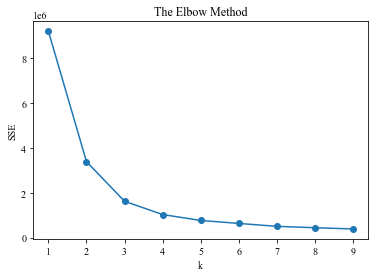

In [147]:
#dt = pd.DataFrame.from_records(data, columns=["agree","comment","retweet"])


# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 10):
    estimator = KMeans(n_clusters=k,init='k-means++',random_state=0)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1, 10), SSE, 'o-')
plt.show()


The last elbow comes at k=3 / k=4
### 轮廓系数
簇内不相似性、最近的簇间不相似性、以及这两个值最大值的比值,代表簇间分离程度的度量


[3]
[0.1278359957426829, 0.11344566993484033, 0.0974893107227561, 0.11094555142318818, 0.10562411118056943, 0.10219627083393087, 0.10762935758594983, 0.104527755715415, 0.10532026365240395, 0.10700793557854756, 0.10551980370551729, 0.108044677052145, 0.10583004171132998, 0.11062009004334512, 0.1146960763455141, 0.11365470887214832, 0.11160949498227665]


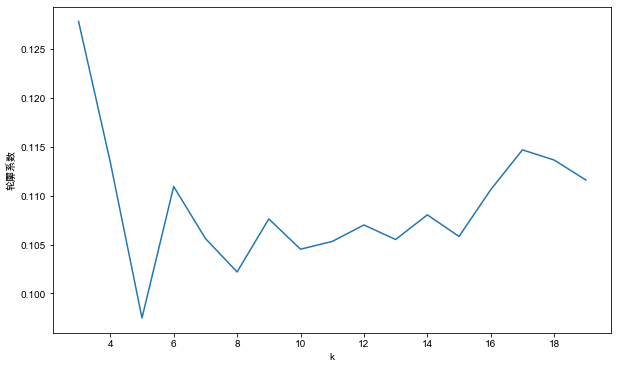

In [148]:
from sklearn.metrics import silhouette_score
from Bio.Cluster import kcluster
from Bio.Cluster import clustercentroids
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'

%matplotlib inline
import numpy as np

coef = []
x=range(3,20)
for clusters in x:
    clusterid, error, nfound = kcluster(X.values, clusters, dist='u',npass=100)
    silhouette_avg = silhouette_score(X.values, clusterid, metric = 'cosine')
    coef.append(silhouette_avg)
  
e =[i+3 for i,j in enumerate(coef) if j == max(coef)]
print (e)
print (coef)
#plt.plot(x,coef)
#plt.show()

plt.figure(figsize=(10,6))
plt.plot(x,coef,linewidth=1.5,linestyle='-')
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.show()

轮廓系数观察曲线的畸变程度，即斜率变化。斜率变化快的部分即为分类的最优选择。从图中可以看到在4~5两段的变化最快

In [149]:
from sklearn.cluster import KMeans # KMeans clustering 
import plotly.graph_objs as go
import plotly.offline as py


from Bio.Cluster import * 
#http://biopython.org/DIST/docs/api
 
#用k-means 或 k-median进行聚类，K为聚类数
#   clusterid: npass次聚类中最好的一次解决方案
#   cdata: 聚类中心的坐标
def KCluster(data, K):
    clusterid, error, nfound = kcluster (data, nclusters=K, dist='u',mask=None, weight=None, transpose=0, npass=1, method='a', initialid=None)
    cdata, cmask = clustercentroids(data, mask=None, transpose=0, clusterid=clusterid, method='a')
    print(cdata)
    return clusterid, cdata
 


#clusterid, error, nfound = kcluster(X.values, nclusters=5, dist='u',npass=100)

#kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
clusterid, cdata= KCluster(X.values, 4)
#y_kmeans= kmeansmodel.fit_predict(X)
trace_Kmeans = go.Scatter(x=X.values[:, 0], y= X.values[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = clusterid,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data1 = [trace_Kmeans]
fig1 = dict(data=data1, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="KMeans(Agree vs. Comment)")



trace_Kmeans2 = go.Scatter(x=X.values[:, 1], y= X.values[:, 2], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = clusterid,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data2 = [trace_Kmeans2]
fig2 = dict(data=data2, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig2, filename="KMeans(Comment vs. Retweet)")

trace_Kmeans3 = go.Scatter(x=X.values[:, 0], y= X.values[:, 2], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = clusterid,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data3 = [trace_Kmeans3]
fig3 = dict(data=data3, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig3, filename="KMeans(Agree vs. Retweet)")

[[0.48635358 0.7622326  0.14457831]
 [2.65322478 0.11601577 0.08573973]
 [6.56351427 0.93116956 1.74258534]
 [2.53059273 0.15391969 1.7000478 ]]


In [151]:
pd.DataFrame(cdata,columns=["agree","comment","retweet"])

agree   comment   retweet
0  0.486354  0.762233  0.144578
1  2.653225  0.116016  0.085740
2  6.563514  0.931170  1.742585
3  2.530593  0.153920  1.700048

In [153]:
#pd.DataFrame(cdata,columns=["agree","comment","retweet"]).to_csv('/Users/patricia/Downloads/clustercenter.csv')

In [154]:
#X.to_csv('/Users/patricia/Downloads/chinese_original.csv')

In [155]:
cnt_acr=pd.DataFrame(np.vstack((np.array(original_chi),np.array(original_eng))),columns=["content","agree","comment","retweet","sentiment"])
cnt_acr

content agree comment retweet  \
0     偶然去银行办业务，被强推了数字钱包，称每个卡都要升级数字钱包，否则以后不能用，以后发工资也要...    14       0       0   
1     比特币基金会主席 布罗克·皮尔斯：我认为中共国对数字货币的打压以推行数字人民币的这一举措让美...     5       0       9   
2     央行前行长周小川：支付系统现代化是隔一段时间迈一个台阶要有比较大的台阶，大家才有足够的动力去...     1       2       0   
3                                 凯尔巴斯：。它就是一个现代数字特洛伊木马。     0       0       0   
4     周小川：不要过多将数字人民币与国际化联系周小川数字人民币国际化人民币数字货币储备货币主导地位...     0       0       0   
...                                                 ...   ...     ...     ...   
7030  digital yuan launch draws near employees paid ...     0       0       0   
7031  digital yuan launch draws near employees paid ...     0       0       0   
7032  digital yuan launch draws near employees paid ...     0       0       0   
7033  employees paid ecny tencent ant mastercard eng...     0       0       0   
7034  digital yuan launch steps employees paid with ...     0       0       0   

     sentiment  
0          neg  
1          pos  
2          neg  
3          pos  
4          pos  
...        ...  
7030       pos  
7031       pos  
7032       pos  
7033       pos  
7034       neu  

[7035 rows x 5 columns]

In [156]:
cdata=pd.DataFrame(cdata,columns=["agree","comment","retweet"])
cdata

agree   comment   retweet
0  0.486354  0.762233  0.144578
1  2.653225  0.116016  0.085740
2  6.563514  0.931170  1.742585
3  2.530593  0.153920  1.700048

In [166]:
cdata.values[0]

array([0.48635358, 0.7622326 , 0.14457831])

In [167]:
set(cnt_acr[cnt_acr["agree"]=="7"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["content"].values)
cnt_acr[cnt_acr["agree"]=="7"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["content"]
print(raw_original_eng.values[13212-len(original_chi)][1])
print(cnt_acr[cnt_acr["agree"]=="7"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["sentiment"])

<ipython-input-167-724ed8f9636a>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-167-724ed8f9636a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexError: index 8737 is out of bounds for axis 0 with size 2560

In [168]:
set(cnt_acr[cnt_acr["agree"]=="6"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["content"].values)
cnt_acr[cnt_acr["agree"]=="6"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["content"]
print(raw_original_eng.values[9562-len(original_chi)][1])
print(cnt_acr[cnt_acr["agree"]=="6"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["sentiment"])
set(cnt_acr[cnt_acr["agree"]==6][cnt_acr["comment"]==1][cnt_acr["retweet"]==0]["content"].values)
cnt_acr[cnt_acr["agree"]==6][cnt_acr["comment"]==1][cnt_acr["retweet"]== 0]["content"]
print(raw_original_chi.values[3552][1],'\n',raw_original_chi.values[4296][1])
print(cnt_acr[cnt_acr["agree"]==6][cnt_acr["comment"]==1][cnt_acr["retweet"]== 0]["sentiment"])

<ipython-input-168-5289526dcc20>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-168-5289526dcc20>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexError: index 5087 is out of bounds for axis 0 with size 2560

In [169]:
set(cnt_acr[cnt_acr["agree"]=="7"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="1"]["content"].values)
cnt_acr[cnt_acr["agree"]=="7"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="1"]["content"]
print(raw_original_eng.values[10046-len(original_chi)][1])
print(cnt_acr[cnt_acr["agree"]=="7"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="1"]["sentiment"])
set(cnt_acr[cnt_acr["agree"]==7][cnt_acr["comment"]==1][cnt_acr["retweet"]==1]["content"].values)
cnt_acr[cnt_acr["agree"]==7][cnt_acr["comment"]==1][cnt_acr["retweet"]== 1]["content"]
print(raw_original_chi.values[6676][1])
print(cnt_acr[cnt_acr["agree"]==7][cnt_acr["comment"]==1][cnt_acr["retweet"]== 1]["sentiment"])

<ipython-input-169-d4175ad6cab8>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-169-d4175ad6cab8>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexError: index 5571 is out of bounds for axis 0 with size 2560

In [ ]:
cdata.values[1]

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="13"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="3"]["content"].values)
cnt_acr[cnt_acr["agree"]=="13"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="3"]["content"]
#print(raw_original_eng.values[8982-len(original_chi)][1])
#print(cnt_acr[cnt_acr["agree"]=="13"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="3"]["sentiment"])

set(cnt_acr[cnt_acr["agree"]==13][cnt_acr["comment"]==1][cnt_acr["retweet"]==3]["content"].values)
cnt_acr[cnt_acr["agree"]==13][cnt_acr["comment"]==1][cnt_acr["retweet"]== 3]["content"]
print(raw_original_chi.values[944][1])
print(cnt_acr[cnt_acr["agree"]==13][cnt_acr["comment"]==1][cnt_acr["retweet"]== 3]["sentiment"])

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="13"][cnt_acr["comment"]=="2"][cnt_acr["retweet"]=="0"]["content"].values)
cnt_acr[cnt_acr["agree"]=="13"][cnt_acr["comment"]=="2"][cnt_acr["retweet"]=="0"]["content"]
print(raw_original_eng.values[11414-len(original_chi)][1])
print(cnt_acr[cnt_acr["agree"]=="13"][cnt_acr["comment"]=="2"][cnt_acr["retweet"]=="0"]["sentiment"])
set(cnt_acr[cnt_acr["agree"]==13][cnt_acr["comment"]==2][cnt_acr["retweet"]==0]["content"].values)
cnt_acr[cnt_acr["agree"]==13][cnt_acr["comment"]==2][cnt_acr["retweet"]== 0]["content"]
print(raw_original_chi.values[96][1])
print(cnt_acr[cnt_acr["agree"]==13][cnt_acr["comment"]==2][cnt_acr["retweet"]== 0]["sentiment"])

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="12"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="0"]["content"].values)
cnt_acr[cnt_acr["agree"]=="12"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="0"]["content"]
print(cnt_acr[cnt_acr["agree"]=="12"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="0"]["sentiment"])
print(raw_original_eng.values[8994-len(original_chi)][1])
set(cnt_acr[cnt_acr["agree"]==12][cnt_acr["comment"]==0][cnt_acr["retweet"]==0]["content"].values)
cnt_acr[cnt_acr["agree"]==12][cnt_acr["comment"]==0][cnt_acr["retweet"]== 0]["content"]
print(cnt_acr[cnt_acr["agree"]==12][cnt_acr["comment"]==0][cnt_acr["retweet"]== 0]["sentiment"])
print(raw_original_chi.values[552][1])

In [ ]:
cdata.values[2]

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="1"][cnt_acr["comment"]=="2"][cnt_acr["retweet"]=="0"]["content"].values)
cnt_acr[cnt_acr["agree"]=="1"][cnt_acr["comment"]=="2"][cnt_acr["retweet"]=="0"]["content"]
print(cnt_acr[cnt_acr["agree"]=="1"][cnt_acr["comment"]=="2"][cnt_acr["retweet"]=="0"]["sentiment"])
print(raw_original_eng.values[11686-len(original_chi)][1],'\n',raw_original_eng.values[12231-len(original_chi)][1])
set(cnt_acr[cnt_acr["agree"]==1][cnt_acr["comment"]==2][cnt_acr["retweet"]==0]["content"].values)
cnt_acr[cnt_acr["agree"]==1][cnt_acr["comment"]==2][cnt_acr["retweet"]== 0]["content"]
print(cnt_acr[cnt_acr["agree"]==1][cnt_acr["comment"]==2][cnt_acr["retweet"]== 0]["sentiment"])
print(raw_original_chi.values[4][1],'\n',raw_original_chi.values[3090][1],'\n',raw_original_chi.values[3238][1],'\n',raw_original_chi.values[3734][1],'\n')

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="2"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["content"].values)
cnt_acr[cnt_acr["agree"]=="2"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["content"]
print(cnt_acr[cnt_acr["agree"]=="2"][cnt_acr["comment"]=="1"][cnt_acr["retweet"]=="0"]["sentiment"])
raw_original_eng.values[9402-len(original_chi)][1],raw_original_eng.values[10543-len(original_chi)][1],raw_original_eng.values[10646-len(original_chi)][1],raw_original_eng.values[11284-len(original_chi)][1],raw_original_eng.values[12382-len(original_chi)][1]

In [ ]:
cdata.values[3]

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="3"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="3"]["content"].values)
cnt_acr[cnt_acr["agree"]=="3"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="3"]["content"]
print(raw_original_eng.values[9082-len(original_chi)][1],'\n',raw_original_eng.values[9338-len(original_chi)][1],'\n',raw_original_eng.values[11578-len(original_chi)][1])
print(cnt_acr[cnt_acr["agree"]=="3"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="3"]["sentiment"])
set(cnt_acr[cnt_acr["agree"]==3][cnt_acr["comment"]==0][cnt_acr["retweet"]==3]["content"].values)
cnt_acr[cnt_acr["agree"]==3][cnt_acr["comment"]==0][cnt_acr["retweet"]== 3]["content"]
print(raw_original_chi.values[4386][1])
print(cnt_acr[cnt_acr["agree"]==3][cnt_acr["comment"]==0][cnt_acr["retweet"]== 3]["sentiment"])

In [ ]:
set(cnt_acr[cnt_acr["agree"]=="4"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="2"]["content"].values)
cnt_acr[cnt_acr["agree"]=="4"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="2"]["content"]
print(cnt_acr[cnt_acr["agree"]=="4"][cnt_acr["comment"]=="0"][cnt_acr["retweet"]=="2"]["sentiment"])
print(raw_original_eng.values[9002-len(original_chi)][1],'\n',raw_original_eng.values[9044-len(original_chi)][1],'\n',raw_original_eng.values[10148-len(original_chi)][1],'\n',raw_original_eng.values[12446-len(original_chi)][1])
set(cnt_acr[cnt_acr["agree"]==4][cnt_acr["comment"]==0][cnt_acr["retweet"]==2]["content"].values)
cnt_acr[cnt_acr["agree"]==4][cnt_acr["comment"]==0][cnt_acr["retweet"]== 2]["content"]
print(cnt_acr[cnt_acr["agree"]==4][cnt_acr["comment"]==0][cnt_acr["retweet"]== 2]["sentiment"])
print(raw_original_chi.values[682][1])
print(raw_original_chi.values[6056][1])
print(raw_original_chi.values[1260][1])
print(raw_original_chi.values[1280][1])
print(raw_original_chi.values[2328][1])
print(raw_original_chi.values[3150][1])

    fit_predict() 无监督学习
    fit_tranform() 有监督学习

In [ ]:
报告结构

0.最简洁抓眼球结论
    1.overview结论：发帖量级+用户行为量级+整体趋势
    2.列举情感词云top3（和情感相悖）
    3.实体识别（人）词频比较
    4.分类结论（分类个数，指导意义）
1. overview
    1.1（第二notebook）总体发帖量+总体评论转发数
    1.2人均+帖均量
    
2. 数据洞察
    2.1 整体情感分析（中文英文加权情感态度）
    2.2（第一notebook）中英文词频词云：正负帖文情感词语*2、展示情感相悖的词语*2
    2.3 实体识别：人名、地名、机构团体
    
3. 基于赞转评数量，模型探索
    3.1 k值 肘部法+轮廓系数
    3.2 聚类展示结果：评论vs转发、点赞vs 、情感打分作为圆半径
    3.3 聚类结果与情感讨论：（聚类中心top3表格：聚类分类+内容+情感+评论情感打分）、解释不做评论上聚类的原因
    
（展望：与政策相关时间点舆情状况、未用上的维度）

    